In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Uninstall existing versions (aggressively)
!pip uninstall torch torchvision torchaudio -y
!pip cache purge

# 2. Check Colab's Python and CUDA versions
import sys
print(f"Colab Python Version: {sys.version_info.major}.{sys.version_info.minor}")
!nvcc --version # Check CUDA version (e.g., CUDA 11.8 or 12.1)

# --- IMPORTANT: Choose one of the following installation blocks based on your Colab setup ---

# Option A: For Python 3.12 (as indicated by your error), with CUDA 12.1 (typical for newer Colab)
# This combination is sometimes a bit trickier, but let's try a specific recent release.
# Note: As of early 2024, Python 3.12 builds on PyTorch's stable channel
# for CUDA 12.1 might still be settling.
# Let's try PyTorch 2.2.0 which usually supports Python 3.12.
!pip install torch==2.2.0 torchvision==0.17.0 torchaudio==2.2.0 --index-url https://download.pytorch.org/whl/cu121

# Option B: More common for Colab (Python 3.11, CUDA 12.1) - often more stable
# If your `sys.version_info` shows 3.11, use this.
# !pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121


# Option C: If Colab is using Python 3.10 with CUDA 11.8 (older Colab environments)
# If your `sys.version_info` shows 3.10 and `nvcc --version` shows 11.8.
# !pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torch 2.8.0+cu126
Uninstalling torch-2.8.0+cu126:
  Successfully uninstalled torch-2.8.0+cu126
Found existing installation: torchvision 0.23.0+cu126
Uninstalling torchvision-0.23.0+cu126:
  Successfully uninstalled torchvision-0.23.0+cu126
Found existing installation: torchaudio 2.8.0+cu126
Uninstalling torchaudio-2.8.0+cu126:
  Successfully uninstalled torchaudio-2.8.0+cu126
Files removed: 0
Colab Python Version: 3.12
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Downgrade numpy to a version compatible with older builds
!pip install "numpy<2"
# Or a specific version known to work well with PyTorch, e.g.,
# !pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 112.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 55.1 MB/s eta 0:00:00


## Faster R_CNN ( all views) Training

In [ ]:
!pip install torch torchvision pycocotools albumentations opencv-python tqdm


In [ ]:
import json, os

# Clean all splits to only include 'Defect' class
for split in ["train", "valid", "test"]:
    path = f"/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/allviews/{split}/_annotations_clean.coco.json"
    if not os.path.exists(path):
        print(f"⚠️ Missing file for {split}")
        continue

    data = json.load(open(path))
    # Keep only the 'Defect' category
    data["categories"] = [c for c in data["categories"] if c["name"].lower() == "defect"]
    ids_keep = [c["id"] for c in data["categories"]]
    data["annotations"] = [a for a in data["annotations"] if a["category_id"] in ids_keep]

    with open(path, "w") as f:
        json.dump(data, f)
    print(f"✅ Cleaned {split} JSON to single class 'Defect'")


In [ ]:
import json, os

# Clean all splits to only include 'Defect' class
for split in ["train", "valid", "test"]:
    path = f"/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/allviews/{split}/_annotations_clean.coco.json"
    if not os.path.exists(path):
        print(f"⚠️ Missing file for {split}")
        continue

    data = json.load(open(path))
    # Keep only the 'Defect' category
    data["categories"] = [c for c in data["categories"] if c["name"].lower() == "defect"]
    ids_keep = [c["id"] for c in data["categories"]]
    data["annotations"] = [a for a in data["annotations"] if a["category_id"] in ids_keep]

    with open(path, "w") as f:
        json.dump(data, f)
    print(f"✅ Cleaned {split} JSON to single class 'Defect'")


✅ Cleaned train JSON to single class 'Defect'
✅ Cleaned valid JSON to single class 'Defect'
✅ Cleaned test JSON to single class 'Defect'


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Faster R-CNN (ResNet50-FPN v2) training/eval for industrial defect detection
- COCO-format datasets: train/valid/test subfolders with _annotations.coco.json
- Strong, bbox-safe augmentations
- Resume training (model, optimizer, best_map, patience counter)
- Clean L2 (exclude biases & norm layers from weight decay)
- AMP (mixed precision) optional
- Early stopping on val mAP (0.50:0.95)
- Saves best and last checkpoints
- Logs to CSV and TensorBoard
"""

import os
import json
import time
import math
import shutil
from pathlib import Path
from typing import Tuple, Dict, List

import cv2
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.ops import box_convert

# Albumentations for bbox-aware transforms
import albumentations as A

# COCO evaluation
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# TensorBoard
from torch.utils.tensorboard import SummaryWriter
import csv
import random

# =========================
# CONFIG
# =========================

class CONFIG:
    DATA_ROOT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/allviews/train"
    TRAIN_JSON = "_annotations_clean.coco.json"
    VAL_JSON   = "../valid/_annotations_clean.coco.json"
    TEST_JSON  = "../test/_annotations_clean.coco.json"
    OUT_DIR    = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/allviews/runs2/fasterrcnn_exp1"

    # Training
    NUM_CLASSES = None      # auto-detect from JSON
    EPOCHS = 100
    BATCH_SIZE = 2
    LR = 2e-4
    WEIGHT_DECAY = 1e-4
    NUM_WORKERS = 2
    DEVICE = "cuda"
    AMP = True
    GRAD_CLIP_NORM = 5.0
    MAX_LONG_SIDE = 1280
    PATIENCE = 10
    PRINT_FREQ = 50
    EVAL_CONF_THRESHOLD = 0.001
    RESUME = True
    SEED = 42

    # Logging
    LOG_CSV = "metrics.csv"        # saved under OUT_DIR
    TB_DIR  = "tb"                  # tensorboard subdir in OUT_DIR

    # Category filtering (optional)
    KEEP_CATEGORIES = ['Defect']    # or None to keep all


# =========================
# Utilities
# =========================

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def ensure_outdir(path: str):
    Path(path).mkdir(parents=True, exist_ok=True)

def coco_id_map(coco: COCO) -> Tuple[Dict[int, int], List[str]]:
    """ Map COCO category_id -> contiguous [1..K], and names list (index = mapped id) """
    cats = sorted(coco.loadCats(coco.getCatIds()), key=lambda c: c["id"])
    id2ind = {}
    names = ["__background__"]  # 0 reserved
    for i, c in enumerate(cats, start=1):
        id2ind[c["id"]] = i
        names.append(c["name"])
    return id2ind, names

def resize_keep_ar(img: np.ndarray, max_long_side: int) -> np.ndarray:
    h, w = img.shape[:2]
    long_side = max(h, w)
    if long_side <= max_long_side:
        return img
    scale = max_long_side / long_side
    new_w = int(round(w * scale))
    new_h = int(round(h * scale))
    return cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

def to_tensor_image(img: np.ndarray) -> torch.Tensor:
    # HWC BGR -> RGB, float [0,1] -> CHW
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.0
    img = np.transpose(img, (2, 0, 1))
    return torch.from_numpy(img)

def collate_fn(batch):
    images, targets = list(zip(*batch))
    return list(images), list(targets)

def get_param_groups(model, weight_decay: float):
    decay, no_decay = [], []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue
        if name.endswith(".bias") or "bn" in name.lower() or "norm" in name.lower():
            no_decay.append(param)
        else:
            decay.append(param)
    return [
        {"params": decay, "weight_decay": weight_decay},
        {"params": no_decay, "weight_decay": 0.0},
    ]

def write_csv_row(csv_path: str, row_dict: Dict[str, float|int|str]):
    file_exists = os.path.exists(csv_path)
    with open(csv_path, "a", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=list(row_dict.keys()))
        if not file_exists:
            writer.writeheader()
        writer.writerow(row_dict)


# =========================
# Dataset
# =========================

class CocoDetDataset(Dataset):
    def __init__(self, data_root: str, anno_relpath: str, max_long_side: int = 1280, aug: bool = False,
                 keep_categories: List[str] | None = None):
        self.data_root = Path(data_root)
        self.annofile = str(self.data_root / anno_relpath)
        self.split_dir = Path(self.annofile).parent

        self.coco = COCO(self.annofile)

        # Optional: keep only certain categories
        self.keep_categories = keep_categories
        if self.keep_categories is not None:
            name_to_id = {c["name"]: c["id"] for c in self.coco.loadCats(self.coco.getCatIds())}
            keep_ids = set(name_to_id[n] for n in self.keep_categories if n in name_to_id)
            img_ids = []
            for img_id in self.coco.getImgIds():
                ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None)
                anns = self.coco.loadAnns(ann_ids)
                if any(a["category_id"] in keep_ids for a in anns):
                    img_ids.append(img_id)
            self.img_ids = img_ids
        else:
            self.img_ids = self.coco.getImgIds()

        self.id2ind, self.class_names = coco_id_map(self.coco)
        self.aug = aug
        self.max_long_side = max_long_side

        if aug:
            self.albu = A.Compose([
                # geometry (safe for boxes)
                A.HorizontalFlip(p=0.5),
                A.ShiftScaleRotate(
                    shift_limit=0.02, scale_limit=0.10, rotate_limit=5,
                    border_mode=cv2.BORDER_CONSTANT, value=0, p=0.40
                ),
                # multi-scale-ish
                A.RandomScale(scale_limit=0.10, p=0.30),
                A.PadIfNeeded(min_height=16, min_width=16,
                              border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),

                # blur/noise
                A.OneOf([
                    A.MotionBlur(blur_limit=3, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 5), p=1.0),
                    A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.3), p=1.0),
                ], p=0.25),

                # color/contrast
                A.RandomBrightnessContrast(brightness_limit=0.20, contrast_limit=0.20, p=0.40),
                A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=10, val_shift_limit=10, p=0.30),
                A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.20),
                A.ToGray(p=0.05),
                A.ChannelShuffle(p=0.05),

                # small occlusions
                A.CoarseDropout(
                    max_holes=4, max_height=0.06, max_width=0.06,
                    min_holes=1, min_height=0.02, min_width=0.02,
                    fill_value=0, p=0.20
                ),
            ], bbox_params=A.BboxParams(
                format='coco',
                label_fields=['category_ids'],
                min_visibility=0.3
            ))
        else:
            self.albu = A.Compose([], bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]

        img_path = str(self.split_dir / img_info["file_name"])
        if not os.path.exists(img_path):
            print(f"[Warning] Missing image: {img_path}, skipping…")
            return self.__getitem__((idx + 1) % len(self.img_ids))

        img = cv2.imread(img_path)
        if img is None:
            raise FileNotFoundError(f"Could not read image: {img_path}")

        ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None)
        anns = self.coco.loadAnns(ann_ids)

        if self.keep_categories is not None:
            keep_ids = set(self.coco.getCatIds(catNms=self.keep_categories))
            anns = [a for a in anns if a["category_id"] in keep_ids]

        boxes, labels = [], []
        for a in anns:
            if a.get("iscrowd", 0) == 1:
                continue
            x, y, w, h = a["bbox"]
            if w <= 1 or h <= 1:
                continue
            boxes.append([x, y, w, h])
            labels.append(self.id2ind[a["category_id"]])

        boxes = np.array(boxes, dtype=np.float32) if boxes else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(labels, dtype=np.int64) if labels else np.zeros((0,), dtype=np.int64)

        # Optional resize
        if CONFIG.MAX_LONG_SIDE is not None:
            img = resize_keep_ar(img, CONFIG.MAX_LONG_SIDE)

        h_new, w_new = img.shape[:2]
        w_old, h_old = img_info["width"], img_info["height"]
        sx, sy = w_new / w_old, h_new / h_old
        if boxes.shape[0] > 0:
            boxes[:, 0] *= sx
            boxes[:, 1] *= sy
            boxes[:, 2] *= sx
            boxes[:, 3] *= sy

        transformed = self.albu(image=img, bboxes=boxes.tolist(), category_ids=labels.tolist())
        img = transformed["image"]
        boxes = np.array(transformed["bboxes"], dtype=np.float32) if transformed["bboxes"] else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(transformed["category_ids"], dtype=np.int64) if transformed["category_ids"] else np.zeros((0,), dtype=np.int64)

        if boxes.shape[0] > 0:
            xyxy = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xywh", out_fmt="xyxy")
        else:
            xyxy = torch.zeros((0, 4), dtype=torch.float32)

        target = {
            "boxes": xyxy,
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor([img_id], dtype=torch.int64),
        }

        img_t = to_tensor_image(img)
        return img_t, target

    @property
    def num_classes(self):
        return len(self.class_names) - 1

    @property
    def class_names_list(self):
        return self.class_names


# =========================
# Model & Training
# =========================

def build_model(num_classes: int):
    # num_classes includes background
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
    return model

def train_one_epoch(model, optimizer, loader, device, epoch, print_freq=50, scaler: torch.cuda.amp.GradScaler | None = None):
    model.train()
    lr_scheduler = None
    if epoch == 0:
        # Warmup LR for first epoch
        warmup_factor = 1.0 / 1000
        warmup_iters = min(1000, len(loader) - 1)
        lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=warmup_factor, total_iters=warmup_iters)

    running_loss = 0.0
    for i, (images, targets) in enumerate(loader):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad(set_to_none=True)

        if scaler is not None:
            with torch.cuda.amp.autocast():
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())
            scaler.scale(losses).backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        running_loss += float(losses.item())
        if (i + 1) % print_freq == 0:
            avg = running_loss / (i + 1)
            print(f"  [train] epoch {epoch+1} step {i+1}/{len(loader)} loss={avg:.4f}")

    return running_loss / max(1, len(loader))

@torch.no_grad()
def evaluate_coco(model, loader, device, coco_gt: COCO, out_dir: str, conf_thresh: float = 0.001) -> Dict[str, float]:
    model.eval()
    results = []
    for images, targets in tqdm(loader, desc="COCO eval"):
        images = [img.to(device) for img in images]
        outputs = model(images)

        for out, tgt in zip(outputs, targets):
            img_id = int(tgt["image_id"].item())
            boxes = out["boxes"].detach().cpu().numpy()
            scores = out["scores"].detach().cpu().numpy()
            labels = out["labels"].detach().cpu().numpy()

            # Convert xyxy -> xywh
            if boxes.shape[0] > 0:
                xywh = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xyxy", out_fmt="xywh").numpy()
            else:
                xywh = np.zeros((0,4), dtype=np.float32)

            for b, s, l in zip(xywh, scores, labels):
                if s < conf_thresh:
                    continue
                # map model label 1..K -> original cat ids
                cat_id = loader.dataset.coco.getCatIds()[l - 1]
                results.append({
                    "image_id": img_id,
                    "category_id": int(cat_id),
                    "bbox": [float(b[0]), float(b[1]), float(b[2]), float(b[3])],
                    "score": float(s),
                })

    pred_json = os.path.join(out_dir, "predictions.json")
    with open(pred_json, "w") as f:
        json.dump(results, f)

    if len(results) == 0:
        print("No predictions—returning zeros.")
        return {"mAP": 0.0, "AP50": 0.0, "AP75": 0.0}

    coco_dt = coco_gt.loadRes(pred_json)
    coco_eval = COCOeval(coco_gt, coco_dt, iouType="bbox")
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    stats = coco_eval.stats  # [AP, AP50, AP75, AP_small, AP_medium, AP_large, AR_1, AR_10, AR_100, AR_small, AR_medium, AR_large]
    return {"mAP": float(stats[0]), "AP50": float(stats[1]), "AP75": float(stats[2])}


# =========================
# Main
# =========================

def main():
    cfg = CONFIG
    set_seed(cfg.SEED)
    ensure_outdir(cfg.OUT_DIR)
    tb_dir = os.path.join(cfg.OUT_DIR, cfg.TB_DIR)
    ensure_outdir(tb_dir)
    writer = SummaryWriter(log_dir=tb_dir)
    csv_path = os.path.join(cfg.OUT_DIR, cfg.LOG_CSV)

    print("Loading datasets...")
    train_set = CocoDetDataset(cfg.DATA_ROOT, cfg.TRAIN_JSON, max_long_side=cfg.MAX_LONG_SIDE, aug=True,
                               keep_categories=cfg.KEEP_CATEGORIES)
    val_set   = CocoDetDataset(cfg.DATA_ROOT, cfg.VAL_JSON,   max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               keep_categories=cfg.KEEP_CATEGORIES)
    test_set  = CocoDetDataset(cfg.DATA_ROOT, cfg.TEST_JSON,  max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               keep_categories=cfg.KEEP_CATEGORIES)

    if cfg.NUM_CLASSES is None:
        num_classes = val_set.num_classes + 1  # + background
    else:
        num_classes = cfg.NUM_CLASSES

    print(f"Classes (foreground): {val_set.class_names_list[1:]}")
    print(f"num_classes (with background) = {num_classes}")

    train_loader = DataLoader(train_set, batch_size=cfg.BATCH_SIZE, shuffle=True,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    val_loader   = DataLoader(val_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    test_loader  = DataLoader(test_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)

    print("Building model...")
    model = build_model(num_classes=num_classes).to(cfg.DEVICE)

    # Optimizer (clean L2)
    params = get_param_groups(model, cfg.WEIGHT_DECAY)
    optimizer = torch.optim.AdamW(params, lr=cfg.LR)

    # AMP scaler
    scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and cfg.DEVICE.startswith("cuda")))

    # ====== Resume support ======
    last_ckpt = os.path.join(cfg.OUT_DIR, "last.pt")
    best_ckpt = os.path.join(cfg.OUT_DIR, "best.pt")

    start_epoch = 0
    best_map = -1.0
    epochs_no_improve = 0

    if cfg.RESUME and os.path.exists(last_ckpt):
        print(f"🔄 Resuming training from: {last_ckpt}")
        ckpt = torch.load(last_ckpt, map_location=cfg.DEVICE)
        model.load_state_dict(ckpt["model"])
        optimizer.load_state_dict(ckpt["optimizer"])
        start_epoch = int(ckpt.get("epoch", 0))
        best_map = float(ckpt.get("best_map", -1.0))
        epochs_no_improve = int(ckpt.get("epochs_no_improve", 0))
        print(f"✅ Resumed at epoch {start_epoch} (best_map={best_map:.4f}, patience_used={epochs_no_improve})")

    # For eval
    coco_val = val_set.coco
    coco_test = test_set.coco

    print("Starting training...")
    for epoch in range(start_epoch, cfg.EPOCHS):
        t0 = time.time()

        train_loss = train_one_epoch(
            model, optimizer, train_loader, cfg.DEVICE, epoch,
            print_freq=cfg.PRINT_FREQ, scaler=scaler
        )

        # Evaluate on validation
        val_metrics = evaluate_coco(
            model, val_loader, cfg.DEVICE, coco_val, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
        )
        val_map, ap50, ap75 = val_metrics["mAP"], val_metrics["AP50"], val_metrics["AP75"]

        # Save "last" checkpoint (epoch is next-to-start index)
        torch.save({
            "epoch": epoch + 1,                # next epoch to run
            "model": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "best_map": best_map,
            "epochs_no_improve": epochs_no_improve,
        }, last_ckpt)

        # Track best
        improved = val_map > best_map
        if improved:
            best_map = val_map
            epochs_no_improve = 0
            shutil.copyfile(last_ckpt, best_ckpt)
            tag = " (new best ✅)"
        else:
            epochs_no_improve += 1
            tag = ""

        dt = time.time() - t0
        print(f"Epoch {epoch+1}/{cfg.EPOCHS} | loss={train_loss:.4f} | val mAP={val_map:.4f}{tag} | "
              f"AP50={ap50:.4f} | AP75={ap75:.4f} | time={dt/60:.1f} min")

        # ---- Logging (CSV + TensorBoard) ----
        row = {
            "epoch": epoch + 1,
            "train_loss": round(train_loss, 6),
            "val_mAP": round(val_map, 6),
            "val_AP50": round(ap50, 6),
            "val_AP75": round(ap75, 6),
            "time_min": round(dt / 60.0, 3),
            "best_mAP_so_far": round(best_map, 6),
        }
        write_csv_row(csv_path, row)

        global_step = epoch + 1
        writer.add_scalar("Loss/train", train_loss, global_step)
        writer.add_scalar("Val/mAP", val_map, global_step)
        writer.add_scalar("Val/AP50", ap50, global_step)
        writer.add_scalar("Val/AP75", ap75, global_step)
        # log LR from first param group
        current_lr = optimizer.param_groups[0].get("lr", cfg.LR)
        writer.add_scalar("LR", current_lr, global_step)

        # Early stopping
        if epochs_no_improve >= cfg.PATIENCE:
            print(f"Early stopping: no improvement for {cfg.PATIENCE} epochs.")
            break

    writer.flush()

    print("\nTraining done.")
    # Load best for final TEST evaluation (if present)
    if os.path.exists(best_ckpt):
        print("Loading best checkpoint for final test...")
        ckpt = torch.load(best_ckpt, map_location=cfg.DEVICE)
        model.load_state_dict(ckpt["model"])

    print("Evaluating on TEST set…")
    test_metrics = evaluate_coco(
        model, test_loader, cfg.DEVICE, coco_test, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
    )
    print(f"TEST: mAP={test_metrics['mAP']:.4f} | AP50={test_metrics['AP50']:.4f} | AP75={test_metrics['AP75']:.4f}")
    print(f"Checkpoints/logs in: {cfg.OUT_DIR}")
    print(f"CSV log: {csv_path}")
    print(f"TensorBoard: {tb_dir}  (run:  tensorboard --logdir='{tb_dir}')")
    writer.close()


if __name__ == "__main__":
    main()


Loading datasets...
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Classes (foreground): ['Defect']
num_classes (with background) = 2
Building model...


/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipython-input-1638745086.py:185: UserWarning: Argument(s) 'value' are not valid for transform ShiftScaleRotate
  A.ShiftScaleRotate(
/tmp/ipython-input-1638745086.py:191: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=16, min_width=16,
/tmp/ipython-input-1638745086.py:210: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(
/usr/local/lib/python3.12/dist-packages/albumentations/core/composition.py:331: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


Starting training...


/tmp/ipython-input-1638745086.py:449: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and cfg.DEVICE.startswith("cuda")))
/tmp/ipython-input-1638745086.py:328: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/usr/local/lib/python3.12/dist-packages/torch/optim/lr_scheduler.py:192: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


  [train] epoch 1 step 50/244 loss=1.2765
  [train] epoch 1 step 100/244 loss=0.8304
  [train] epoch 1 step 150/244 loss=0.6797
  [train] epoch 1 step 200/244 loss=0.5802


COCO eval: 100%|██████████| 70/70 [00:18<00:00,  3.85it/s]


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.49s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.388
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.135
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.063
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.318
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.95it/s]


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.44s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.439
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.038
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.118
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.055
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.082
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.257
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.309
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:18<00:00,  3.88it/s]


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.38s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.131
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.463
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.162
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.330
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.90it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.41s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.484
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.033
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.129
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.255
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.315
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.91it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.23s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.380
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.209
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.081
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.257
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.332
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.97it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.27s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.469
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.129
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.089
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.278
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.349
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.94it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.26s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.507
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.033
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.085
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.305
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.97it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.53s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.500
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.051
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.221
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.359
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.91it/s]


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.57s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.509
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.087
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.339
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.98it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.38s).
Accumulating evaluation results...
DONE (t=0.53s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.032
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.082
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.319
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.93it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.23s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.126
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.420
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.136
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.258
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.078
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.256
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.332
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.95it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.27s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.494
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.239
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.086
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.318
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.93it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.22s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.529
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.072
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.434
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.095
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.337
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.95it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.446
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.319
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.095
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.258
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.98it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.31s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.175
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.528
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.059
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.388
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.098
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.272
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.340
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.97it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.25s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.530
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.198
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.334
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.098
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.341
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.95it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.22s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.502
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.360
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.091
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.277
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.330
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  4.01it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.22s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.503
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.037
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.309
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.089
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.272
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.314
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.98it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.30s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.497
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.068
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.332
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.091
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.325
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.96it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.24s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.463
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.258
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.083
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.337
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.98it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.468
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.148
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.083
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.99it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.27s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.059
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.262
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.263
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.321
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.98it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.496
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.254
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.318
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.99it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.494
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.246
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.086
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.266
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.317
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  4.00it/s]


Loading and preparing results...
DONE (t=0.37s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.424
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.229
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.081
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.264
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.299
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 70/70 [00:17<00:00,  3.97it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.18s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.314
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.089
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.274
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 34/34 [00:19<00:00,  1.72it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.528
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.048
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.200
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.132
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.116
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.304
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.358
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [ ]:
# ------------------------------------------------------------
# ✅ Reload dataset metadata to restore NUM_CLASSES
# ------------------------------------------------------------
import json
from pycocotools.coco import COCO   # <-- make sure pycocotools is imported

TRAIN_ANN_FILE = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/allviews/train/_annotations_clean.coco.json"

coco = COCO(TRAIN_ANN_FILE)
unique_cat_ids = coco.getCatIds()
NUM_CLASSES = len(unique_cat_ids) + 1
categories = coco.loadCats(unique_cat_ids)
cat_id_to_name = {cat['id']: cat['name'] for cat in categories}

print(f"✅ NUM_CLASSES restored to {NUM_CLASSES}")
print(f"✅ Categories: {cat_id_to_name}")


loading annotations into memory...
Done (t=6.28s)
creating index...
index created!
✅ NUM_CLASSES restored to 2
✅ Categories: {1: 'Defect'}


Installing deps...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 19.3 MB/s eta 0:00:00
Using device: cuda
Loading COCO categories...
loading annotations into memory...
Done (t=4.76s)
creating index...
index created!
✅ NUM_CLASSES = 2
✅ Label map (model id → name): {1: 'Defect'}
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Initialized CocoDataset from 622 images; filtered to 488 valid images.
Train images: 488
loading annotations into memory...
Done (t=0.44s)
creating index...
index created!
Initialized CocoDataset from 177 images; filtered to 139 valid images.
Validation images: 139
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:00<00:00, 178MB/s]


Skipping training (RUN_TRAINING=False).
Loading checkpoint: /content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/allviews/train_results/faster_rcnn_finetuned.pth

🔍 Running inference on: /content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/allviews/test/enhanced_Line1Cam10REJImage814_01_14398_png.rf.a8c616c78f4be17a9f21a70990ddd256.jpg


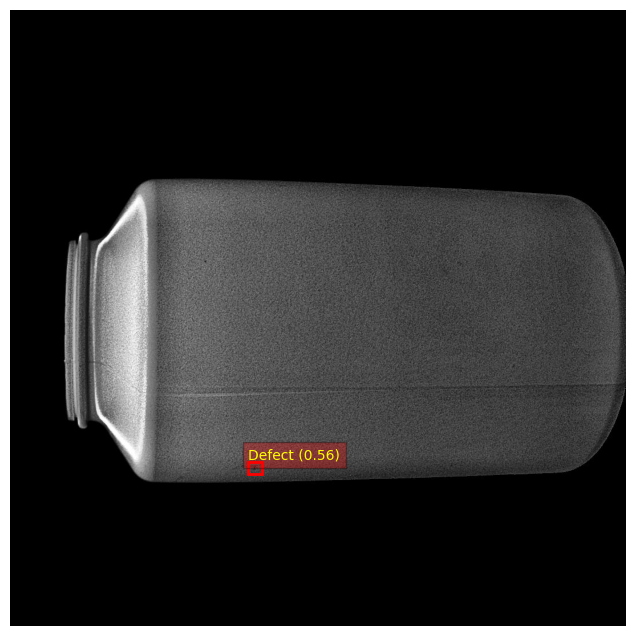

In [ ]:
# ============================================================
# 🚀 Faster R-CNN (ResNet50-FPN) — Train + Evaluate + Inference
# Option B: Single-image testing (no batch export)
# - Set RUN_TRAINING below to True/False
# ============================================================

# 0) Installs (quiet)
print("Installing deps...")
!pip install -q torchmetrics pycocotools

# ------------------------------------------------------------
# 1) Imports
# ------------------------------------------------------------
import os, json, random
import numpy as np
import torch, torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import CocoDetection
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader
from torchmetrics.detection import MeanAveragePrecision
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO



# ------------------------------------------------------------
# 2) Config
# ------------------------------------------------------------
BASE_DATA_PATH = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/allviews"
TRAIN_ROOT_DIR = os.path.join(BASE_DATA_PATH, "train")
VAL_ROOT_DIR   = os.path.join(BASE_DATA_PATH, "valid")
TRAIN_ANN_FILE = os.path.join(BASE_DATA_PATH, "train", "_annotations_clean.coco.json")
VAL_ANN_FILE   = os.path.join(BASE_DATA_PATH, "valid", "_annotations_clean.coco.json")

CHECKPOINT_PATH = os.path.join(BASE_DATA_PATH, "train_results", "faster_rcnn_finetuned.pth")

# Inference image (change this to your test image)
TEST_IMAGE = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/allviews/test/enhanced_Line1Cam10REJImage814_01_14398_png.rf.a8c616c78f4be17a9f21a70990ddd256.jpg"

# Toggle training (set to True to train; False to only load checkpoint + infer)
RUN_TRAINING = False

BATCH_SIZE   = 4
LEARNING_RATE= 0.005
NUM_EPOCHS   = 50
DEVICE       = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# ------------------------------------------------------------
# 3) Dataset + robust transforms
# ------------------------------------------------------------
class CocoDataset(CocoDetection):
    def __init__(self, root, annFile, transforms=None):
        super().__init__(root, annFile)
        self.transforms = transforms

        initial_image_count = len(self.ids)
        filtered_ids = []
        for img_id in self.ids:
            if len(self.coco.getAnnIds(imgIds=img_id, iscrowd=False)) > 0:
                filtered_ids.append(img_id)
        self.ids = filtered_ids
        print(f"Initialized CocoDataset from {initial_image_count} images; "
              f"filtered to {len(self.ids)} valid images.")

    def __getitem__(self, idx):
        img_id = self.ids[idx]
        image_info = self.coco.loadImgs(img_id)[0]
        image_filename = image_info['file_name']
        image_path = os.path.join(self.root, image_filename)

        # Handle missing/corrupt
        if not os.path.exists(image_path):
            print(f"[Warning] Missing image: {image_path}")
            new_idx = np.random.randint(0, len(self.ids))
            return self.__getitem__(new_idx)

        try:
            image = Image.open(image_path).convert("RGB")
        except Exception as e:
            print(f"[Warning] Failed to open {image_path}: {e}")
            new_idx = np.random.randint(0, len(self.ids))
            return self.__getitem__(new_idx)

        # Load anns
        annotations = self.coco.loadAnns(self.coco.getAnnIds(img_id))
        annotations = [ann for ann in annotations if ann['area'] > 0 and ann['iscrowd'] == 0]

        boxes, labels = [], []
        coco_cat_ids = sorted(self.coco.getCatIds())
        coco_id_to_model_id = {coco_id: i + 1 for i, coco_id in enumerate(coco_cat_ids)}

        if not annotations:
            boxes = torch.empty((0, 4), dtype=torch.float32)
            labels = torch.empty((0,), dtype=torch.int64)
        else:
            for ann in annotations:
                x, y, w, h = ann['bbox']
                boxes.append([x, y, x + w, y + h])
                labels.append(coco_id_to_model_id[ann['category_id']])
            boxes  = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels, "image_id": torch.tensor([img_id])}

        if self.transforms is not None:
            image, target = self.transforms(image, target)
        return image, target

class Compose:
    def __init__(self, transforms): self.transforms = transforms
    def __call__(self, image, target):
        for t in self.transforms: image, target = t(image, target)
        return image, target

class ToTensor:
    def __call__(self, image, target):
        image = F.to_tensor(image)
        return image, target

def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return [], []
    return tuple(zip(*batch))

# ------------------------------------------------------------
# 4) Model builder
# ------------------------------------------------------------
def get_model_instance_segmentation(num_classes):
    weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

# ------------------------------------------------------------
# 5) Train & Evaluate helpers
# ------------------------------------------------------------
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    total_loss = 0
    for i, (images, targets) in enumerate(data_loader):
        if len(images) == 0:  # skip empty
            continue
        images  = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        total_loss += losses.item()
        if i % 20 == 0:
            print(f"Epoch {epoch} | Iter {i}/{len(data_loader)} | Loss {losses.item():.4f}")
    return total_loss / max(len(data_loader), 1)

def evaluate(model, data_loader, device):
    if data_loader is None:
        print("⚠️ No validation loader; skipping evaluation.")
        return None
    model.eval()
    metric = MeanAveragePrecision(class_metrics=True).to(device)
    with torch.no_grad():
        for images, targets in data_loader:
            if len(images) == 0:
                continue
            images  = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            preds = model(images)
            metric.update(preds, targets)
    return metric.compute()

# ------------------------------------------------------------
# 6) Restore metadata (NUM_CLASSES + label names)
# ------------------------------------------------------------
print("Loading COCO categories...")
coco = COCO(TRAIN_ANN_FILE)
unique_cat_ids = sorted(coco.getCatIds())
categories = coco.loadCats(unique_cat_ids)

# NUM_CLASSES includes background class 0
NUM_CLASSES = len(unique_cat_ids) + 1

# Build model_id -> name mapping using the same sort order used in training
# model label 1..N follows sorted(unique_cat_ids)
model_id_to_name = {i + 1: categories[i]['name'] for i in range(len(categories))}
print(f"✅ NUM_CLASSES = {NUM_CLASSES}")
print(f"✅ Label map (model id → name): {model_id_to_name}")

# ------------------------------------------------------------
# 7) Dataloaders
# ------------------------------------------------------------
transform = Compose([ToTensor()])

train_dataset = CocoDataset(TRAIN_ROOT_DIR, TRAIN_ANN_FILE, transforms=transform)
if len(train_dataset) == 0:
    raise ValueError("Training dataset is empty.")
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=2, collate_fn=collate_fn)
print(f"Train images: {len(train_dataset)}")

if os.path.exists(VAL_ANN_FILE):
    val_dataset = CocoDataset(VAL_ROOT_DIR, VAL_ANN_FILE, transforms=transform)
    val_loader  = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False,
                             num_workers=2, collate_fn=collate_fn) if len(val_dataset) > 0 else None
    if val_loader is None:
        print("⚠️ Validation dataset empty.")
    else:
        print(f"Validation images: {len(val_dataset)}")
else:
    val_loader = None
    print("⚠️ No validation annotations found; skipping validation.")

# ------------------------------------------------------------
# 8) Train (optional) + Save
# ------------------------------------------------------------
train_loss_history, val_map_history, val_mar_history = [], [], []

model = get_model_instance_segmentation(NUM_CLASSES).to(DEVICE)

if RUN_TRAINING:
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.SGD(params, lr=LEARNING_RATE, momentum=0.9, weight_decay=5e-4)
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

    print("\nStarting training...")
    for epoch in range(NUM_EPOCHS):
        print(f"\n--- Epoch {epoch+1}/{NUM_EPOCHS} ---")
        epoch_loss = train_one_epoch(model, optimizer, train_loader, DEVICE, epoch+1)
        lr_scheduler.step()
        train_loss_history.append(epoch_loss)
        print(f"Epoch {epoch+1} avg loss: {epoch_loss:.4f}")

        # Evaluate
        if val_loader is not None:
            print("Evaluating on validation set...")
            eval_results = evaluate(model, val_loader, DEVICE)
            if eval_results is not None:
                val_map_history.append(eval_results['map'].item())
                val_mar_history.append(eval_results['mar_100'].item())
                print(f"mAP@.50:.95: {eval_results['map'].item():.4f} | "
                      f"mAP@.50: {eval_results['map_50'].item():.4f} | "
                      f"mAR@100: {eval_results['mar_100'].item():.4f}")
    # Save
    os.makedirs(os.path.dirname(CHECKPOINT_PATH), exist_ok=True)
    torch.save(model.state_dict(), CHECKPOINT_PATH)
    print(f"💾 Saved checkpoint to: {CHECKPOINT_PATH}")
else:
    print("Skipping training (RUN_TRAINING=False).")

# ------------------------------------------------------------
# 9) Load checkpoint for inference (always)
# ------------------------------------------------------------
if os.path.exists(CHECKPOINT_PATH):
    print(f"Loading checkpoint: {CHECKPOINT_PATH}")
    model.load_state_dict(torch.load(CHECKPOINT_PATH, map_location=DEVICE))
else:
    raise FileNotFoundError(
        f"Checkpoint not found at {CHECKPOINT_PATH}. "
        f"Set RUN_TRAINING=True to train and create it, or correct the path."
    )
model.eval()

# ------------------------------------------------------------
# 10) Inference helper (single image)
# ------------------------------------------------------------
def run_inference(image_path, score_thresh=0.5):
    img = Image.open(image_path).convert("RGB")
    img_tensor = F.to_tensor(img).to(DEVICE)

    with torch.no_grad():
        outputs = model([img_tensor])[0]

    boxes  = outputs['boxes'].cpu().numpy()
    scores = outputs['scores'].cpu().numpy()
    labels = outputs['labels'].cpu().numpy()

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(img); ax.axis('off')

    drawn = 0
    for box, score, label in zip(boxes, scores, labels):
        if score < score_thresh:
            continue
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Map model label id → class name
        cls_name = model_id_to_name.get(int(label), f"cls {int(label)}")
        ax.text(x1, max(0, y1 - 5), f"{cls_name} ({score:.2f})",
                color="yellow", fontsize=10, bbox=dict(facecolor='red', alpha=0.3))
        drawn += 1

    if drawn == 0:
        print(f"No boxes above threshold {score_thresh:.2f}. "
              f"Try lowering it or check the image.")
    plt.show()

# ------------------------------------------------------------
# 11) Quick test on one image
# ------------------------------------------------------------
if os.path.exists(TEST_IMAGE):
    print(f"\n🔍 Running inference on: {TEST_IMAGE}")
    run_inference(TEST_IMAGE, score_thresh=0.5)
else:
    print(f"⚠️ TEST_IMAGE not found at: {TEST_IMAGE}. Please update the path.")


In [ ]:
# ============================================================
# ✅ FULL EVALUATION + FINAL 4 METRICS (THESIS READY)
# ============================================================

from torchvision.ops import box_iou

def compute_manual_metrics(iou_threshold):
    tp = fp = fn = 0
    model.eval()
    with torch.no_grad():
        for images, targets in test_loader:
            images  = [img.to(DEVICE) for img in images]
            preds   = model(images)

            for pred, target in zip(preds, targets):
                pred_boxes = pred["boxes"].cpu()
                gt_boxes   = target["boxes"].cpu()

                # Case 1: no predictions, but GT exists
                if len(pred_boxes) == 0 and len(gt_boxes) > 0:
                    fn += len(gt_boxes)
                    continue

                # Case 2: predictions, but no GT
                if len(gt_boxes) == 0 and len(pred_boxes) > 0:
                    fp += len(pred_boxes)
                    continue

                # IoU matrix
                ious = box_iou(pred_boxes, gt_boxes)

                # TP/FP per image
                image_tp = 0
                image_fp = 0
                for i in range(len(pred_boxes)):
                    max_iou = ious[i].max().item()
                    if max_iou >= iou_threshold:
                        image_tp += 1
                    else:
                        image_fp += 1

                # FN per image
                matched_gt = (ious.max(dim=0).values >= iou_threshold).sum().item()
                image_fn = len(gt_boxes) - matched_gt

                tp += image_tp
                fp += image_fp
                fn += image_fn

    precision = tp / (tp + fp + 1e-6)
    recall    = tp / (tp + fn + 1e-6)
    accuracy  = tp / (tp + fp + fn + 1e-6)
    return precision, recall, accuracy


# ============================================================
# ✅ EXTRACT CORE METRICS
# ============================================================

map_50_95 = test_results['map'].item()
map_50     = test_results['map_50'].item()
prec50, rec50, acc50 = compute_manual_metrics(0.50)

# ============================================================
# ✅ PRINT THESIS-READY RESULTS
# ============================================================
print("\n===== ✅ FINAL CORE EVALUATION METRICS =====")
print(f"mAP@50:95 : {map_50_95:.4f}")
print(f"mAP@50    : {map_50:.4f}")
print(f"Precision : {prec50:.4f}")
print(f"Recall    : {rec50:.4f}")



===== ✅ FINAL CORE EVALUATION METRICS =====
mAP@50:95 : 0.1625
mAP@50    : 0.5043
Precision : 0.1968
Recall    : 0.8581


# Side view

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Faster R-CNN (ResNet50-FPN v2) training/eval for industrial defect detection
- COCO-format datasets: train/valid/test subfolders with _annotations.coco.json
- Strong, bbox-safe augmentations
- Resume training (model, optimizer, best_map, patience counter)
- Clean L2 (exclude biases & norm layers from weight decay)
- AMP (mixed precision) optional
- Early stopping on val mAP (0.50:0.95)
- Saves best and last checkpoints
- Logs to CSV and TensorBoard
- PLUS: Precision / Recall / Accuracy (P50/R50/A50 and P5095/R5095/A5095) printed inline & logged
"""

import os
import json
import time
import math
import shutil
from pathlib import Path
from typing import Tuple, Dict, List, Any

import cv2
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.ops import box_convert

# Albumentations for bbox-aware transforms
import albumentations as A

# COCO evaluation
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# TensorBoard
from torch.utils.tensorboard import SummaryWriter
import csv
import random


# =========================
# CONFIG
# =========================

class CONFIG:
    DATA_ROOT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/sideviews /Defects only.v4i.coco/train"
    TRAIN_JSON = "_annotations.coco.json"
    VAL_JSON   = "../valid/_annotations.coco.json"
    TEST_JSON  = "../test/_annotations.coco.json"
    OUT_DIR    = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/sideviews /runs0/fasterrcnn_exp1"

    # Training
    NUM_CLASSES = None      # auto-detect from JSON
    EPOCHS = 100
    BATCH_SIZE = 2
    LR = 2e-4
    WEIGHT_DECAY = 1e-4
    NUM_WORKERS = 2
    DEVICE = "cuda"
    AMP = True
    GRAD_CLIP_NORM = 5.0
    MAX_LONG_SIDE = 1280
    PATIENCE = 40
    PRINT_FREQ = 50
    EVAL_CONF_THRESHOLD = 0.001
    RESUME = True
    SEED = 42

    # Logging
    LOG_CSV = "metrics.csv"        # saved under OUT_DIR
    TB_DIR  = "tb"                  # tensorboard subdir in OUT_DIR

    # Category filtering (optional)
    KEEP_CATEGORIES = ['Defect']    # or None to keep all


# =========================
# Utilities
# =========================

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def ensure_outdir(path: str):
    Path(path).mkdir(parents=True, exist_ok=True)

def coco_id_map(coco: COCO) -> Tuple[Dict[int, int], List[str]]:
    """ Map COCO category_id -> contiguous [1..K], and names list (index = mapped id) """
    cats = sorted(coco.loadCats(coco.getCatIds()), key=lambda c: c["id"])
    id2ind = {}
    names = ["__background__"]  # 0 reserved
    for i, c in enumerate(cats, start=1):
        id2ind[c["id"]] = i
        names.append(c["name"])
    return id2ind, names

def resize_keep_ar(img: np.ndarray, max_long_side: int) -> np.ndarray:
    h, w = img.shape[:2]
    long_side = max(h, w)
    if long_side <= max_long_side:
        return img
    scale = max_long_side / long_side
    new_w = int(round(w * scale))
    new_h = int(round(h * scale))
    return cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

def to_tensor_image(img: np.ndarray) -> torch.Tensor:
    # HWC BGR -> RGB, float [0,1] -> CHW
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.0
    img = np.transpose(img, (2, 0, 1))
    return torch.from_numpy(img)

def collate_fn(batch):
    images, targets = list(zip(*batch))
    return list(images), list(targets)

def get_param_groups(model, weight_decay: float):
    decay, no_decay = [], []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue
        if name.endswith(".bias") or "bn" in name.lower() or "norm" in name.lower():
            no_decay.append(param)
        else:
            decay.append(param)
    return [
        {"params": decay, "weight_decay": weight_decay},
        {"params": no_decay, "weight_decay": 0.0},
    ]

def write_csv_row(csv_path: str, row_dict: Dict[str, Any]):
    file_exists = os.path.exists(csv_path)
    with open(csv_path, "a", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=list(row_dict.keys()))
        if not file_exists:
            writer.writeheader()
        writer.writerow(row_dict)


# =========================
# Dataset
# =========================

class CocoDetDataset(Dataset):
    def __init__(self, data_root: str, anno_relpath: str, max_long_side: int = 1280, aug: bool = False,
                 keep_categories: List[str] | None = None):
        self.data_root = Path(data_root)
        self.annofile = str(self.data_root / anno_relpath)
        self.split_dir = Path(self.annofile).parent

        self.coco = COCO(self.annofile)

        # Optional: keep only certain categories
        self.keep_categories = keep_categories
        if self.keep_categories is not None:
            name_to_id = {c["name"]: c["id"] for c in self.coco.loadCats(self.coco.getCatIds())}
            keep_ids = set(name_to_id[n] for n in self.keep_categories if n in name_to_id)
            img_ids = []
            for img_id in self.coco.getImgIds():
                ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None)
                anns = self.coco.loadAnns(ann_ids)
                if any(a["category_id"] in keep_ids for a in anns):
                    img_ids.append(img_id)
            self.img_ids = img_ids
        else:
            self.img_ids = self.coco.getImgIds()

        self.id2ind, self.class_names = coco_id_map(self.coco)
        self.aug = aug
        self.max_long_side = max_long_side

        if aug:
            self.albu = A.Compose([
                # geometry (safe for boxes)
                A.HorizontalFlip(p=0.5),
                A.ShiftScaleRotate(
                    shift_limit=0.02, scale_limit=0.10, rotate_limit=5,
                    border_mode=cv2.BORDER_CONSTANT, value=0, p=0.40
                ),
                # multi-scale-ish
                A.RandomScale(scale_limit=0.10, p=0.30),
                A.PadIfNeeded(min_height=16, min_width=16,
                              border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),

                # blur/noise
                A.OneOf([
                    A.MotionBlur(blur_limit=3, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 5), p=1.0),
                    A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.3), p=1.0),
                ], p=0.25),

                # color/contrast
                A.RandomBrightnessContrast(brightness_limit=0.20, contrast_limit=0.20, p=0.40),
                A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=10, val_shift_limit=10, p=0.30),
                A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.20),
                A.ToGray(p=0.05),
                A.ChannelShuffle(p=0.05),

                # small occlusions
                A.CoarseDropout(
                    max_holes=4, max_height=0.06, max_width=0.06,
                    min_holes=1, min_height=0.02, min_width=0.02,
                    fill_value=0, p=0.20
                ),
            ], bbox_params=A.BboxParams(
                format='coco',
                label_fields=['category_ids'],
                min_visibility=0.3
            ))
        else:
            self.albu = A.Compose([], bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]

        img_path = str(self.split_dir / img_info["file_name"])
        if not os.path.exists(img_path):
            print(f"[Warning] Missing image: {img_path}, skipping…")
            return self.__getitem__((idx + 1) % len(self.img_ids))

        img = cv2.imread(img_path)
        if img is None:
            raise FileNotFoundError(f"Could not read image: {img_path}")

        ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None)
        anns = self.coco.loadAnns(ann_ids)

        if self.keep_categories is not None:
            keep_ids = set(self.coco.getCatIds(catNms=self.keep_categories))
            anns = [a for a in anns if a["category_id"] in keep_ids]

        boxes, labels = [], []
        for a in anns:
            if a.get("iscrowd", 0) == 1:
                continue
            x, y, w, h = a["bbox"]
            if w <= 1 or h <= 1:
                continue
            boxes.append([x, y, w, h])
            labels.append(self.id2ind[a["category_id"]])

        boxes = np.array(boxes, dtype=np.float32) if boxes else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(labels, dtype=np.int64) if labels else np.zeros((0,), dtype=np.int64)

        # Optional resize
        if CONFIG.MAX_LONG_SIDE is not None:
            img = resize_keep_ar(img, CONFIG.MAX_LONG_SIDE)

        h_new, w_new = img.shape[:2]
        w_old, h_old = img_info["width"], img_info["height"]
        sx, sy = w_new / w_old, h_new / h_old
        if boxes.shape[0] > 0:
            boxes[:, 0] *= sx
            boxes[:, 1] *= sy
            boxes[:, 2] *= sx
            boxes[:, 3] *= sy

        transformed = self.albu(image=img, bboxes=boxes.tolist(), category_ids=labels.tolist())
        img = transformed["image"]
        boxes = np.array(transformed["bboxes"], dtype=np.float32) if transformed["bboxes"] else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(transformed["category_ids"], dtype=np.int64) if transformed["category_ids"] else np.zeros((0,), dtype=np.int64)

        if boxes.shape[0] > 0:
            xyxy = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xywh", out_fmt="xyxy")
        else:
            xyxy = torch.zeros((0, 4), dtype=torch.float32)

        target = {
            "boxes": xyxy,
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor([img_id], dtype=torch.int64),
        }

        img_t = to_tensor_image(img)
        return img_t, target

    @property
    def num_classes(self):
        return len(self.class_names) - 1

    @property
    def class_names_list(self):
        return self.class_names


# =========================
# Model & Training
# =========================

def build_model(num_classes: int):
    # num_classes includes background
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
    return model

def train_one_epoch(model, optimizer, loader, device, epoch, print_freq=50, scaler: torch.cuda.amp.GradScaler | None = None):
    model.train()
    lr_scheduler = None
    if epoch == 0:
        # Warmup LR for first epoch
        warmup_factor = 1.0 / 1000
        warmup_iters = min(1000, len(loader) - 1)
        lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=warmup_factor, total_iters=warmup_iters)

    running_loss = 0.0
    for i, (images, targets) in enumerate(loader):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad(set_to_none=True)

        if scaler is not None:
            with torch.cuda.amp.autocast():
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())
            scaler.scale(losses).backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        running_loss += float(losses.item())
        if (i + 1) % print_freq == 0:
            avg = running_loss / (i + 1)
            print(f"  [train] epoch {epoch+1} step {i+1}/{len(loader)} loss={avg:.4f}")

    return running_loss / max(1, len(loader))


# =========================
# Metrics helpers (P/R/Acc)
# =========================

def _xywh_to_xyxy(box_xywh: np.ndarray) -> np.ndarray:
    x, y, w, h = box_xywh.T
    return np.stack([x, y, x + w, y + h], axis=1)

def _iou_matrix(boxes1_xyxy: np.ndarray, boxes2_xyxy: np.ndarray) -> np.ndarray:
    # boxes: (N,4) and (M,4), returns (N,M)
    if boxes1_xyxy.size == 0 or boxes2_xyxy.size == 0:
        return np.zeros((boxes1_xyxy.shape[0], boxes2_xyxy.shape[0]), dtype=np.float32)
    A = boxes1_xyxy
    B = boxes2_xyxy
    inter_x1 = np.maximum(A[:, None, 0], B[None, :, 0])
    inter_y1 = np.maximum(A[:, None, 1], B[None, :, 1])
    inter_x2 = np.minimum(A[:, None, 2], B[None, :, 2])
    inter_y2 = np.minimum(A[:, None, 3], B[None, :, 3])
    inter_w = np.clip(inter_x2 - inter_x1, a_min=0, a_max=None)
    inter_h = np.clip(inter_y2 - inter_y1, a_min=0, a_max=None)
    inter = inter_w * inter_h
    areaA = (A[:, 2] - A[:, 0]) * (A[:, 3] - A[:, 1])
    areaB = (B[:, 2] - B[:, 0]) * (B[:, 3] - B[:, 1])
    union = areaA[:, None] + areaB[None, :] - inter
    iou = np.where(union > 0, inter / union, 0.0)
    return iou.astype(np.float32)


def _compute_counts_for_threshold(
    coco_gt: COCO,
    detections: List[Dict[str, Any]],
    allowed_cat_ids: set[int],
    iou_thr: float
) -> tuple[int, int, int]:
    """
    Greedy per-image, per-category matching at the given IoU threshold.
    Returns (TP, FP, FN).
    """
    # Group detections by image id
    dets_by_img: Dict[int, List[Dict[str, Any]]] = {}
    for d in detections:
        if d["category_id"] not in allowed_cat_ids:
            continue
        dets_by_img.setdefault(d["image_id"], []).append(d)

    TP = FP = FN = 0

    for img_id in coco_gt.getImgIds():
        # load GT anns (exclude crowd)
        ann_ids = coco_gt.getAnnIds(imgIds=[img_id], iscrowd=None)
        gts = [a for a in coco_gt.loadAnns(ann_ids) if a.get("iscrowd", 0) == 0 and a["category_id"] in allowed_cat_ids]

        # organize GT by category
        gt_by_cat: Dict[int, List[np.ndarray]] = {}
        for a in gts:
            gt_by_cat.setdefault(a["category_id"], []).append(np.array(a["bbox"], dtype=np.float32))
        # convert gt to xyxy and matched flags
        gt_xyxy_by_cat: Dict[int, np.ndarray] = {cid: _xywh_to_xyxy(np.stack(bboxes, axis=0)) if len(bboxes) > 0 else np.zeros((0,4), dtype=np.float32)
                                                 for cid, bboxes in gt_by_cat.items()}
        gt_matched_by_cat: Dict[int, np.ndarray] = {cid: np.zeros(len(bboxes), dtype=bool) for cid, bboxes in gt_by_cat.items()}

        # detections for this image
        dets = dets_by_img.get(img_id, [])
        # Group detections by category and sort by score desc
        dets_by_cat: Dict[int, List[Dict[str, Any]]] = {}
        for d in dets:
            dets_by_cat.setdefault(d["category_id"], []).append(d)
        for cid in dets_by_cat:
            dets_by_cat[cid].sort(key=lambda x: x["score"], reverse=True)

        # per-category greedy matching
        for cid, det_list in dets_by_cat.items():
            gt_xyxy = gt_xyxy_by_cat.get(cid, np.zeros((0,4), dtype=np.float32))
            gt_m = gt_matched_by_cat.get(cid, np.zeros((0,), dtype=bool))

            for d in det_list:
                det_xyxy = _xywh_to_xyxy(np.array([d["bbox"]], dtype=np.float32))  # (1,4)
                if gt_xyxy.shape[0] == 0:
                    # no GTs of this class in this image
                    FP += 1
                    continue

                ious = _iou_matrix(det_xyxy, gt_xyxy)[0]  # (Ngt,)
                # among unmatched GTs, find best IoU
                ious[gt_m] = -1.0  # mask out already matched GTs
                best_idx = int(np.argmax(ious)) if ious.size > 0 else -1
                best_iou = ious[best_idx] if best_idx >= 0 else -1.0

                if best_iou >= iou_thr:
                    TP += 1
                    gt_m[best_idx] = True
                else:
                    FP += 1

            # update back
            gt_matched_by_cat[cid] = gt_m

        # any remaining unmatched GTs are FN
        for cid, gt_m in gt_matched_by_cat.items():
            FN += int((~gt_m).sum())

    return TP, FP, FN

def _compute_pr_acc_unified(
    coco_gt: COCO,
    detections: List[Dict[str, Any]],
    allowed_cat_ids: set[int]
) -> Dict[str, float]:
    """
    Computes:
      - P50 / R50 / A50  at IoU = 0.50
      - P5095 / R5095 / A5095 as averages over IoU = 0.50 .. 0.95 (step 0.05)
    """
    def safe_div(a, b): return float(a) / float(b) if b > 0 else 0.0

    # IoU = 0.50
    tp50, fp50, fn50 = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, 0.50)
    P50 = safe_div(tp50, tp50 + fp50)
    R50 = safe_div(tp50, tp50 + fn50)
    A50 = safe_div(tp50, tp50 + fp50 + fn50)

    # IoU sweep 0.50..0.95
    thrs = np.arange(0.50, 0.96, 0.05)
    p_list, r_list, a_list = [], [], []
    for thr in thrs:
        tp, fp, fn = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, float(thr))
        p_list.append(safe_div(tp, tp + fp))
        r_list.append(safe_div(tp, tp + fn))
        a_list.append(safe_div(tp, tp + fp + fn))

    P5095 = float(np.mean(p_list)) if len(p_list) else 0.0
    R5095 = float(np.mean(r_list)) if len(r_list) else 0.0
    A5095 = float(np.mean(a_list)) if len(a_list) else 0.0

    return {"P50": P50, "R50": R50, "A50": A50,
            "P5095": P5095, "R5095": R5095, "A5095": A5095}


# =========================
# Evaluation (COCO + P/R/Acc)
# =========================

@torch.no_grad()
def evaluate_coco(model, loader, device, coco_gt: COCO, out_dir: str, conf_thresh: float = 0.001) -> Dict[str, float]:
    """
    Returns dict with:
      mAP, AP50, AP75,
      P50, R50, A50,
      P5095, R5095, A5095
    """
    model.eval()
    results: List[Dict[str, Any]] = []
    for images, targets in tqdm(loader, desc="COCO eval"):
        images = [img.to(device) for img in images]
        outputs = model(images)

        for out, tgt in zip(outputs, targets):
            img_id = int(tgt["image_id"].item())
            boxes = out["boxes"].detach().cpu().numpy()
            scores = out["scores"].detach().cpu().numpy()
            labels = out["labels"].detach().cpu().numpy()

            # Convert xyxy -> xywh
            if boxes.shape[0] > 0:
                xywh = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xyxy", out_fmt="xywh").numpy()
            else:
                xywh = np.zeros((0,4), dtype=np.float32)

            for b, s, l in zip(xywh, scores, labels):
                if s < conf_thresh:
                    continue
                # map model label 1..K -> original cat ids
                cat_id = loader.dataset.coco.getCatIds()[l - 1]
                results.append({
                    "image_id": img_id,
                    "category_id": int(cat_id),
                    "bbox": [float(b[0]), float(b[1]), float(b[2]), float(b[3])],
                    "score": float(s),
                })

    pred_json = os.path.join(out_dir, "predictions.json")
    with open(pred_json, "w") as f:
        json.dump(results, f)

    # If nothing predicted
    if len(results) == 0:
        print("No predictions—returning zeros.")
        return {
            "mAP": 0.0, "AP50": 0.0, "AP75": 0.0,
            "P50": 0.0, "R50": 0.0, "A50": 0.0,
            "P5095": 0.0, "R5095": 0.0, "A5095": 0.0
        }

    coco_dt = coco_gt.loadRes(pred_json)
    coco_eval = COCOeval(coco_gt, coco_dt, iouType="bbox")
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    stats = coco_eval.stats  # [AP, AP50, AP75, AP_small, AP_medium, AP_large, AR_1, AR_10, AR_100, AR_small, AR_medium, AR_large]

    # ---- Compute P/R/Acc (50 and 50:95) using greedy matching aligned to dataset categories ----
    allowed_cat_ids = set(loader.dataset.coco.getCatIds())
    pr_acc = _compute_pr_acc_unified(coco_gt, results, allowed_cat_ids)

    return {
        "mAP": float(stats[0]),
        "AP50": float(stats[1]),
        "AP75": float(stats[2]),
        "P50": pr_acc["P50"], "R50": pr_acc["R50"], "A50": pr_acc["A50"],
        "P5095": pr_acc["P5095"], "R5095": pr_acc["R5095"], "A5095": pr_acc["A5095"],
    }


# =========================
# Main
# =========================

def main():
    cfg = CONFIG
    set_seed(cfg.SEED)
    ensure_outdir(cfg.OUT_DIR)
    tb_dir = os.path.join(cfg.OUT_DIR, cfg.TB_DIR)
    ensure_outdir(tb_dir)
    writer = SummaryWriter(log_dir=tb_dir)
    csv_path = os.path.join(cfg.OUT_DIR, cfg.LOG_CSV)

    print("Loading datasets...")
    train_set = CocoDetDataset(cfg.DATA_ROOT, cfg.TRAIN_JSON, max_long_side=cfg.MAX_LONG_SIDE, aug=True,
                               keep_categories=cfg.KEEP_CATEGORIES)
    val_set   = CocoDetDataset(cfg.DATA_ROOT, cfg.VAL_JSON,   max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               keep_categories=cfg.KEEP_CATEGORIES)
    test_set  = CocoDetDataset(cfg.DATA_ROOT, cfg.TEST_JSON,  max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               keep_categories=cfg.KEEP_CATEGORIES)

    if cfg.NUM_CLASSES is None:
        num_classes = val_set.num_classes + 1  # + background
    else:
        num_classes = cfg.NUM_CLASSES

    print(f"Classes (foreground): {val_set.class_names_list[1:]}")
    print(f"num_classes (with background) = {num_classes}")

    train_loader = DataLoader(train_set, batch_size=cfg.BATCH_SIZE, shuffle=True,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    val_loader   = DataLoader(val_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    test_loader  = DataLoader(test_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)

    print("Building model...")
    model = build_model(num_classes=num_classes).to(cfg.DEVICE)

    # Optimizer (clean L2)
    params = get_param_groups(model, cfg.WEIGHT_DECAY)
    optimizer = torch.optim.AdamW(params, lr=cfg.LR)

    # AMP scaler
    scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and cfg.DEVICE.startswith("cuda")))

    # ====== Resume support ======
    last_ckpt = os.path.join(cfg.OUT_DIR, "last.pt")
    best_ckpt = os.path.join(cfg.OUT_DIR, "best.pt")

    start_epoch = 0
    best_map = -1.0
    epochs_no_improve = 0

    if cfg.RESUME and os.path.exists(last_ckpt):
        print(f"🔄 Resuming training from: {last_ckpt}")
        ckpt = torch.load(last_ckpt, map_location=cfg.DEVICE)
        model.load_state_dict(ckpt["model"])
        optimizer.load_state_dict(ckpt["optimizer"])
        start_epoch = int(ckpt.get("epoch", 0))
        best_map = float(ckpt.get("best_map", -1.0))
        epochs_no_improve = int(ckpt.get("epochs_no_improve", 0))
        print(f"✅ Resumed at epoch {start_epoch} (best_map={best_map:.4f}, patience_used={epochs_no_improve})")

    # For eval
    coco_val = val_set.coco
    coco_test = test_set.coco

    print("Starting training...")
    for epoch in range(start_epoch, cfg.EPOCHS):
        t0 = time.time()

        train_loss = train_one_epoch(
            model, optimizer, train_loader, cfg.DEVICE, epoch,
            print_freq=cfg.PRINT_FREQ, scaler=scaler
        )

        # Evaluate on validation
        val_metrics = evaluate_coco(
            model, val_loader, cfg.DEVICE, coco_val, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
        )

        val_map, ap50, ap75 = val_metrics["mAP"], val_metrics["AP50"], val_metrics["AP75"]
        P50, R50, A50 = val_metrics["P50"], val_metrics["R50"], val_metrics["A50"]
        P5095, R5095, A5095 = val_metrics["P5095"], val_metrics["R5095"], val_metrics["A5095"]

        # Save "last" checkpoint (epoch is next-to-start index)
        torch.save({
            "epoch": epoch + 1,                # next epoch to run
            "model": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "best_map": best_map,
            "epochs_no_improve": epochs_no_improve,
        }, last_ckpt)

        # Track best (by mAP50-95)
        improved = val_map > best_map
        if improved:
            best_map = val_map
            epochs_no_improve = 0
            shutil.copyfile(last_ckpt, best_ckpt)
            tag = " (new best ✅)"
        else:
            epochs_no_improve += 1
            tag = ""

        dt = time.time() - t0

        # ---- Inline print (compact style, 3 decimals for P/R/Acc) ----
        print(
            f"Epoch {epoch+1}/{cfg.EPOCHS} | loss={train_loss:.4f} | "
            f"mAP={val_map:.4f}{tag} | AP50={ap50:.4f} | AP75={ap75:.4f} | "
            f"P50={P50:.3f} R50={R50:.3f} A50={A50:.3f} | "
            f"P5095={P5095:.3f} R5095={R5095:.3f} A5095={A5095:.3f} | "
            f"time={dt/60:.1f} min"
        )

        # ---- Logging (CSV + TensorBoard) ----
        row = {
            "epoch": epoch + 1,
            "train_loss": round(train_loss, 6),
            "val_mAP": round(val_map, 6),
            "val_AP50": round(ap50, 6),
            "val_AP75": round(ap75, 6),
            "P50": round(P50, 6), "R50": round(R50, 6), "A50": round(A50, 6),
            "P5095": round(P5095, 6), "R5095": round(R5095, 6), "A5095": round(A5095, 6),
            "time_min": round(dt / 60.0, 3),
            "best_mAP_so_far": round(best_map, 6),
        }
        write_csv_row(csv_path, row)

        global_step = epoch + 1
        writer.add_scalar("Loss/train", train_loss, global_step)
        writer.add_scalar("Val/mAP", val_map, global_step)
        writer.add_scalar("Val/AP50", ap50, global_step)
        writer.add_scalar("Val/AP75", ap75, global_step)
        writer.add_scalar("Val/P50", P50, global_step)
        writer.add_scalar("Val/R50", R50, global_step)
        writer.add_scalar("Val/A50", A50, global_step)
        writer.add_scalar("Val/P5095", P5095, global_step)
        writer.add_scalar("Val/R5095", R5095, global_step)
        writer.add_scalar("Val/A5095", A5095, global_step)
        # log LR from first param group
        current_lr = optimizer.param_groups[0].get("lr", cfg.LR)
        writer.add_scalar("LR", current_lr, global_step)

        # Early stopping
        if epochs_no_improve >= cfg.PATIENCE:
            print(f"Early stopping: no improvement for {cfg.PATIENCE} epochs.")
            break

    writer.flush()

    print("\nTraining done.")
    # Load best for final TEST evaluation (if present)
    if os.path.exists(best_ckpt):
        print("Loading best checkpoint for final test...")
        ckpt = torch.load(best_ckpt, map_location=cfg.DEVICE)
        model.load_state_dict(ckpt["model"])

    print("Evaluating on TEST set…")
    test_metrics = evaluate_coco(
        model, test_loader, cfg.DEVICE, coco_test, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
    )
    print(
        f"TEST: mAP={test_metrics['mAP']:.4f} | AP50={test_metrics['AP50']:.4f} | AP75={test_metrics['AP75']:.4f} | "
        f"P50={test_metrics['P50']:.3f} R50={test_metrics['R50']:.3f} A50={test_metrics['A50']:.3f} | "
        f"P5095={test_metrics['P5095']:.3f} R5095={test_metrics['R5095']:.3f} A5095={test_metrics['A5095']:.3f}"
    )
    print(f"Checkpoints/logs in: {cfg.OUT_DIR}")
    print(f"CSV log: {csv_path}")
    print(f"TensorBoard: {tb_dir}  (run:  tensorboard --logdir='{tb_dir}')")
    writer.close()


if __name__ == "__main__":
    main()


Loading datasets...
loading annotations into memory...
Done (t=0.41s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Classes (foreground): ['Defect']
num_classes (with background) = 2
Building model...


/tmp/ipython-input-4094986143.py:187: UserWarning: Argument(s) 'value' are not valid for transform ShiftScaleRotate
  A.ShiftScaleRotate(
/tmp/ipython-input-4094986143.py:193: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=16, min_width=16,
/tmp/ipython-input-4094986143.py:212: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


Starting training...


/tmp/ipython-input-4094986143.py:616: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and cfg.DEVICE.startswith("cuda")))
/tmp/ipython-input-4094986143.py:330: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


  [train] epoch 1 step 50/104 loss=0.8553
  [train] epoch 1 step 100/104 loss=0.5991


COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.373
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.033
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.066
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.231
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.265
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.445
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.054
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.123
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.290
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.344
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:19<00:00,  1.50it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.476
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.318
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:20<00:00,  1.49it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.478
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.036
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.120
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.086
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:19<00:00,  1.51it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.499
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.072
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.277
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.327
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.458
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.091
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.241
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.128
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.339
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:19<00:00,  1.51it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.570
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.236
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.299
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.128
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.317
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.360
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.175
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.538
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.299
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.347
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.39it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.421
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.028
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.297
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.445
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.202
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.121
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.286
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.194
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.557
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.113
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.311
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.351
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.51it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.472
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.077
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.238
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.136
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.113
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.125
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.294
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.328
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.51it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.531
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.085
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.304
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.509
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.212
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.312
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.48it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.516
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.053
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.133
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.222
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.099
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.297
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.483
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.217
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.141
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.304
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.358
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.47it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.538
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.229
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.304
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.329
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.505
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.186
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.097
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.271
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.521
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.164
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.291
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.317
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.52it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.532
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.158
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.289
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.311
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.531
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.220
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.123
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.332
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.48it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.535
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.254
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.46it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.513
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.074
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.258
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.296
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.499
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.198
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.176
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.272
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.509
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.308
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.333
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.518
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.230
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.172
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.53it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.13s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.477
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.075
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.232
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.286
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.307
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.537
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.129
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.181
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.121
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.297
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.327
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.059
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.212
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.096
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.102
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.285
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.302
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.529
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.094
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.166
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.134
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.305
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.340
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.486
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.046
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.232
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.098
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.301
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.468
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.303
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.106
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.298
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.319
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.190
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.535
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.186
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.297
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.310
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.46it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.175
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.498
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.068
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.243
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.105
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.317
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.46it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.234
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.291
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.528
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.243
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.136
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.318
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.325
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:20<00:00,  1.50it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.476
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.091
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.219
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.309
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.318
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.538
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.278
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.309
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.312
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.506
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.218
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.146
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.294
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.521
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.213
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.269
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.123
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.308
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.333
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.52it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.497
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.066
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.101
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.534
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.264
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.132
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.304
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.317
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.50it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.478
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.095
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.217
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.292
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.446
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.188
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.299
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.304
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.513
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.202
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.121
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.470
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.059
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.146
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.102
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.285
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.471
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.114
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.299
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.495
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.078
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.262
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.113
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.456
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.075
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.098
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.263
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.504
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.091
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.271
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.294
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.301
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.480
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.105
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.114
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.074
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.219
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.126
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.163
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.106
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.277
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.415
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.091
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.209
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.486
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.077
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.193
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.224
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.265
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.47it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.467
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.237
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.099
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.235
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.304
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.305
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.484
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.100
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.311
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.265
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.271
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.471
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.497
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.126
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.174
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.309
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.61it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.499
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.061
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.47it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.113
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.263
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.269
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.481
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.212
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.136
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.483
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.088
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.254
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.286
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.294
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.53it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.498
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.232
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.291
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.303
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.502
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.311
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.282
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.53it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.479
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.222
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.218
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.132
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.294
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.479
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.100
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.236
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.264
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.50it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.167
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.106
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.282
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.446
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.078
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.251
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.264
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.274
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.473
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.056
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.229
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.261
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.34it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.212
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.544
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.249
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.314
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.318
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:20<00:00,  1.50it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.500
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.219
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.246
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.483
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.213
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.184
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.52it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.482
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.457
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.203
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.274
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.51it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.091
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.186
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.261
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.274
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.457
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.256
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.264
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.48it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.463
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.284
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.291
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.53it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.503
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.105
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.284
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.294
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.463
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.200
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.136
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.295
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.271
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.50it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.167
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.447
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.262
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.263
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.60it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.483
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.285
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.290
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.129
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.234
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.269
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.277
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.50it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.438
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.236
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.114
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.296
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.301
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.490
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.106
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.220
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.255
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.111
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.291
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.452
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.098
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.482
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.080
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.133
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.236
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.116
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.286
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.471
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.217
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.195
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.492
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.243
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.194
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.125
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.296
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.46it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.487
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.223
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.073
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.292
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.294
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.167
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.432
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.114
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.457
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.213
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.204
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.255
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.263
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.477
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.106
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.211
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.265
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.490
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.091
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.189
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.274
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.506
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.237
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.294
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.474
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.251
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.113
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.474
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.229
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.121
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.278
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.476
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.224
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.299
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.450
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.237
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.289
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.502
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 30/30 [00:08<00:00,  3.67it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.500
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.214
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.283
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.577
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.525
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.320
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.329
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ===========================================
# ✅ TEST-ONLY EVALUATION (Compact Output)
# Faster R-CNN (ResNet50-FPN v2)
# - Loads best.pt
# - Evaluates TEST set only
# - Prints mAP50:95, mAP50, Precision, Recall (greedy)
# ===========================================

import os, json
import torch
import numpy as np
from tqdm import tqdm
from pathlib import Path

import cv2
import albumentations as A

import torchvision
from torchvision.ops import box_convert
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from torch.utils.data import Dataset, DataLoader

# =========================
# CONFIG
# =========================
BEST_CKPT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/sideviews /runs0/fasterrcnn_exp1/best.pt"
DATA_ROOT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/sideviews /Defects only.v4i.coco/train"
TEST_JSON = "../valid/_annotations.coco.json"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_CLASSES = 2  # 1 foreground class (Defect) + background

# =========================
# Test Dataset
# =========================
class CocoTestDataset(Dataset):
    def __init__(self, data_root, anno_relpath, max_long_side=1280):
        self.data_root = Path(data_root)
        self.annofile = str(self.data_root / anno_relpath)
        self.split_dir = Path(self.annofile).parent
        self.coco = COCO(self.annofile)
        self.img_ids = self.coco.getImgIds()
        self.max_long_side = max_long_side

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]
        img_path = str(self.split_dir / img_info["file_name"])
        img = cv2.imread(img_path)

        # Resize if too large
        h0, w0 = img.shape[:2]
        long_side = max(h0, w0)
        if long_side > self.max_long_side:
            scale = self.max_long_side / long_side
            img = cv2.resize(img, (int(w0*scale), int(h0*scale)))

        # To tensor
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
        img = torch.tensor(img.transpose(2, 0, 1), dtype=torch.float32)

        return img, {"image_id": torch.tensor([img_id])}

def collate_fn(batch):
    return tuple(zip(*batch))

# =========================
# Build Faster R-CNN v2
# =========================
def build_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

# =========================
# Greedy Precision/Recall
# =========================
def compute_pr_metrics(coco_gt, results, iou_thr=0.50):
    tp = fp = fn = 0
    by_img = {}
    for d in results:
        by_img.setdefault(d["image_id"], []).append(d)

    for img_id in coco_gt.getImgIds():
        ann_ids = coco_gt.getAnnIds(imgIds=[img_id], iscrowd=None)
        gts = coco_gt.loadAnns(ann_ids)
        gt_boxes = np.array([a["bbox"] for a in gts], dtype=np.float32) if gts else np.zeros((0,4))
        gt_xyxy = box_convert(torch.tensor(gt_boxes), "xywh", "xyxy").numpy()
        matched = np.zeros(len(gt_xyxy), dtype=bool)

        dets = by_img.get(img_id, [])
        for d in dets:
            db = np.array([d["bbox"]], dtype=np.float32)
            db = box_convert(torch.tensor(db), "xywh", "xyxy").numpy()
            if len(gt_xyxy)==0:
                fp += 1
                continue
            xA = np.maximum(db[:,0], gt_xyxy[:,0])
            yA = np.maximum(db[:,1], gt_xyxy[:,1])
            xB = np.minimum(db[:,2], gt_xyxy[:,2])
            yB = np.minimum(db[:,3], gt_xyxy[:,3])
            inter = np.maximum(0,xB-xA)*np.maximum(0,yB-yA)
            boxA = (db[:,2]-db[:,0])*(db[:,3]-db[:,1])
            boxB = (gt_xyxy[:,2]-gt_xyxy[:,0])*(gt_xyxy[:,3]-gt_xyxy[:,1])
            iou = inter/(boxA+boxB-inter+1e-6)
            best = iou.argmax()
            if iou[best] >= iou_thr and not matched[best]:
                tp += 1
                matched[best] = True
            else:
                fp += 1
        fn += (~matched).sum()

    prec = tp/(tp+fp+1e-6)
    rec  = tp/(tp+fn+1e-6)
    return prec, rec

# =========================
# EVALUATION PIPELINE
# =========================
print("Loading test dataset...")
test_set = CocoTestDataset(DATA_ROOT, TEST_JSON)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False,
                         num_workers=2, collate_fn=collate_fn)
coco_gt = test_set.coco

print("Building model...")
model = build_model(NUM_CLASSES).to(DEVICE)

print(f"Loading checkpoint: {BEST_CKPT}")
ckpt = torch.load(BEST_CKPT, map_location=DEVICE)
model.load_state_dict(ckpt["model"])
model.eval()

print("Running test evaluation...")
results = []
with torch.no_grad():
    for imgs, targets in tqdm(test_loader):
        imgs = [img.to(DEVICE) for img in imgs]
        outs = model(imgs)[0]

        boxes  = outs["boxes"].cpu().numpy()
        scores = outs["scores"].cpu().numpy()
        xywh = box_convert(torch.tensor(boxes), "xyxy", "xywh").numpy() if len(boxes) else []
        img_id = int(targets[0]["image_id"].item())  # <-- FIXED
        cat_id = coco_gt.getCatIds()[0]

        for b, s in zip(xywh, scores):
            results.append({
                "image_id": img_id,
                "category_id": cat_id,
                "bbox": [float(b[0]), float(b[1]), float(b[2]), float(b[3])],
                "score": float(s),
            })

# ========= COCO mAP ==========
coco_dt = coco_gt.loadRes(results)
coco_eval = COCOeval(coco_gt, coco_dt, "bbox")
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()
mAP50_95, mAP50 = coco_eval.stats[0], coco_eval.stats[1]

# ========= Greedy Precision/Recall =========
prec, rec = compute_pr_metrics(coco_gt, results, 0.50)

# ========= Compact thesis-style output ======
print("\n===== ✅ FINAL TEST METRICS =====")
print(f"mAP@50:95 : {mAP50_95:.4f}")
print(f"mAP@50    : {mAP50:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print("=================================\n")


Loading test dataset...
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Building model...
Loading checkpoint: /content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/sideviews /runs0/fasterrcnn_exp1/best.pt
Running test evaluation...


100%|██████████| 91/91 [00:27<00:00,  3.33it/s]

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.526
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.242
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.166
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.314
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.318
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

# Top view

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Faster R-CNN (ResNet50-FPN v2) training/eval for industrial defect detection
- COCO-format datasets: train/valid/test subfolders with _annotations.coco.json
- Strong, bbox-safe augmentations
- Resume training (model, optimizer, best_map, patience counter)
- Clean L2 (exclude biases & norm layers from weight decay)
- AMP (mixed precision) optional
- Early stopping on val mAP (0.50:0.95)
- Saves best and last checkpoints
- Logs to CSV and TensorBoard
- PLUS: Precision / Recall / Accuracy (P50/R50/A50 and P5095/R5095/A5095) printed inline & logged
"""

import os
import json
import time
import math
import shutil
from pathlib import Path
from typing import Tuple, Dict, List, Any

import cv2
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.ops import box_convert

# Albumentations for bbox-aware transforms
import albumentations as A

# COCO evaluation
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# TensorBoard
from torch.utils.tensorboard import SummaryWriter
import csv
import random


# =========================
# CONFIG
# =========================

class CONFIG:
    DATA_ROOT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/Topview/train"
    TRAIN_JSON = "_annotations.coco.json"
    VAL_JSON   = "../valid/_annotations.coco.json"
    TEST_JSON  = "../test/_annotations.coco.json"
    OUT_DIR    = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/Topview/runs0/fasterrcnn_exp1"

    # Training
    NUM_CLASSES = None      # auto-detect from JSON
    EPOCHS = 100
    BATCH_SIZE = 2
    LR = 2e-4
    WEIGHT_DECAY = 1e-4
    NUM_WORKERS = 2
    DEVICE = "cuda"
    AMP = True
    GRAD_CLIP_NORM = 5.0
    MAX_LONG_SIDE = 1280
    PATIENCE = 40
    PRINT_FREQ = 50
    EVAL_CONF_THRESHOLD = 0.001
    RESUME = True
    SEED = 42

    # Logging
    LOG_CSV = "metrics.csv"        # saved under OUT_DIR
    TB_DIR  = "tb"                  # tensorboard subdir in OUT_DIR

    # Category filtering (optional)
    KEEP_CATEGORIES = ['Defect']    # or None to keep all


# =========================
# Utilities
# =========================

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def ensure_outdir(path: str):
    Path(path).mkdir(parents=True, exist_ok=True)

def coco_id_map(coco: COCO) -> Tuple[Dict[int, int], List[str]]:
    """ Map COCO category_id -> contiguous [1..K], and names list (index = mapped id) """
    cats = sorted(coco.loadCats(coco.getCatIds()), key=lambda c: c["id"])
    id2ind = {}
    names = ["__background__"]  # 0 reserved
    for i, c in enumerate(cats, start=1):
        id2ind[c["id"]] = i
        names.append(c["name"])
    return id2ind, names

def resize_keep_ar(img: np.ndarray, max_long_side: int) -> np.ndarray:
    h, w = img.shape[:2]
    long_side = max(h, w)
    if long_side <= max_long_side:
        return img
    scale = max_long_side / long_side
    new_w = int(round(w * scale))
    new_h = int(round(h * scale))
    return cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

def to_tensor_image(img: np.ndarray) -> torch.Tensor:
    # HWC BGR -> RGB, float [0,1] -> CHW
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.0
    img = np.transpose(img, (2, 0, 1))
    return torch.from_numpy(img)

def collate_fn(batch):
    images, targets = list(zip(*batch))
    return list(images), list(targets)

def get_param_groups(model, weight_decay: float):
    decay, no_decay = [], []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue
        if name.endswith(".bias") or "bn" in name.lower() or "norm" in name.lower():
            no_decay.append(param)
        else:
            decay.append(param)
    return [
        {"params": decay, "weight_decay": weight_decay},
        {"params": no_decay, "weight_decay": 0.0},
    ]

def write_csv_row(csv_path: str, row_dict: Dict[str, Any]):
    file_exists = os.path.exists(csv_path)
    with open(csv_path, "a", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=list(row_dict.keys()))
        if not file_exists:
            writer.writeheader()
        writer.writerow(row_dict)


# =========================
# Dataset
# =========================

class CocoDetDataset(Dataset):
    def __init__(self, data_root: str, anno_relpath: str, max_long_side: int = 1280, aug: bool = False,
                 keep_categories: List[str] | None = None):
        self.data_root = Path(data_root)
        self.annofile = str(self.data_root / anno_relpath)
        self.split_dir = Path(self.annofile).parent

        self.coco = COCO(self.annofile)

        # Optional: keep only certain categories
        self.keep_categories = keep_categories
        if self.keep_categories is not None:
            name_to_id = {c["name"]: c["id"] for c in self.coco.loadCats(self.coco.getCatIds())}
            keep_ids = set(name_to_id[n] for n in self.keep_categories if n in name_to_id)
            img_ids = []
            for img_id in self.coco.getImgIds():
                ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None)
                anns = self.coco.loadAnns(ann_ids)
                if any(a["category_id"] in keep_ids for a in anns):
                    img_ids.append(img_id)
            self.img_ids = img_ids
        else:
            self.img_ids = self.coco.getImgIds()

        self.id2ind, self.class_names = coco_id_map(self.coco)
        self.aug = aug
        self.max_long_side = max_long_side

        if aug:
            self.albu = A.Compose([
                # geometry (safe for boxes)
                A.HorizontalFlip(p=0.5),
                A.ShiftScaleRotate(
                    shift_limit=0.02, scale_limit=0.10, rotate_limit=5,
                    border_mode=cv2.BORDER_CONSTANT, value=0, p=0.40
                ),
                # multi-scale-ish
                A.RandomScale(scale_limit=0.10, p=0.30),
                A.PadIfNeeded(min_height=16, min_width=16,
                              border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),

                # blur/noise
                A.OneOf([
                    A.MotionBlur(blur_limit=3, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 5), p=1.0),
                    A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.3), p=1.0),
                ], p=0.25),

                # color/contrast
                A.RandomBrightnessContrast(brightness_limit=0.20, contrast_limit=0.20, p=0.40),
                A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=10, val_shift_limit=10, p=0.30),
                A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.20),
                A.ToGray(p=0.05),
                A.ChannelShuffle(p=0.05),

                # small occlusions
                A.CoarseDropout(
                    max_holes=4, max_height=0.06, max_width=0.06,
                    min_holes=1, min_height=0.02, min_width=0.02,
                    fill_value=0, p=0.20
                ),
            ], bbox_params=A.BboxParams(
                format='coco',
                label_fields=['category_ids'],
                min_visibility=0.3
            ))
        else:
            self.albu = A.Compose([], bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]

        img_path = str(self.split_dir / img_info["file_name"])
        if not os.path.exists(img_path):
            print(f"[Warning] Missing image: {img_path}, skipping…")
            return self.__getitem__((idx + 1) % len(self.img_ids))

        img = cv2.imread(img_path)
        if img is None:
            raise FileNotFoundError(f"Could not read image: {img_path}")

        ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None)
        anns = self.coco.loadAnns(ann_ids)

        if self.keep_categories is not None:
            keep_ids = set(self.coco.getCatIds(catNms=self.keep_categories))
            anns = [a for a in anns if a["category_id"] in keep_ids]

        boxes, labels = [], []
        for a in anns:
            if a.get("iscrowd", 0) == 1:
                continue
            x, y, w, h = a["bbox"]
            if w <= 1 or h <= 1:
                continue
            boxes.append([x, y, w, h])
            labels.append(self.id2ind[a["category_id"]])

        boxes = np.array(boxes, dtype=np.float32) if boxes else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(labels, dtype=np.int64) if labels else np.zeros((0,), dtype=np.int64)

        # Optional resize
        if CONFIG.MAX_LONG_SIDE is not None:
            img = resize_keep_ar(img, CONFIG.MAX_LONG_SIDE)

        h_new, w_new = img.shape[:2]
        w_old, h_old = img_info["width"], img_info["height"]
        sx, sy = w_new / w_old, h_new / h_old
        if boxes.shape[0] > 0:
            boxes[:, 0] *= sx
            boxes[:, 1] *= sy
            boxes[:, 2] *= sx
            boxes[:, 3] *= sy

        transformed = self.albu(image=img, bboxes=boxes.tolist(), category_ids=labels.tolist())
        img = transformed["image"]
        boxes = np.array(transformed["bboxes"], dtype=np.float32) if transformed["bboxes"] else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(transformed["category_ids"], dtype=np.int64) if transformed["category_ids"] else np.zeros((0,), dtype=np.int64)

        if boxes.shape[0] > 0:
            xyxy = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xywh", out_fmt="xyxy")
        else:
            xyxy = torch.zeros((0, 4), dtype=torch.float32)

        target = {
            "boxes": xyxy,
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor([img_id], dtype=torch.int64),
        }

        img_t = to_tensor_image(img)
        return img_t, target

    @property
    def num_classes(self):
        return len(self.class_names) - 1

    @property
    def class_names_list(self):
        return self.class_names


# =========================
# Model & Training
# =========================

def build_model(num_classes: int):
    # num_classes includes background
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
    return model

def train_one_epoch(model, optimizer, loader, device, epoch, print_freq=50, scaler: torch.cuda.amp.GradScaler | None = None):
    model.train()
    lr_scheduler = None
    if epoch == 0:
        # Warmup LR for first epoch
        warmup_factor = 1.0 / 1000
        warmup_iters = min(1000, len(loader) - 1)
        lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=warmup_factor, total_iters=warmup_iters)

    running_loss = 0.0
    for i, (images, targets) in enumerate(loader):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad(set_to_none=True)

        if scaler is not None:
            with torch.cuda.amp.autocast():
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())
            scaler.scale(losses).backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        running_loss += float(losses.item())
        if (i + 1) % print_freq == 0:
            avg = running_loss / (i + 1)
            print(f"  [train] epoch {epoch+1} step {i+1}/{len(loader)} loss={avg:.4f}")

    return running_loss / max(1, len(loader))


# =========================
# Metrics helpers (P/R/Acc)
# =========================

def _xywh_to_xyxy(box_xywh: np.ndarray) -> np.ndarray:
    x, y, w, h = box_xywh.T
    return np.stack([x, y, x + w, y + h], axis=1)

def _iou_matrix(boxes1_xyxy: np.ndarray, boxes2_xyxy: np.ndarray) -> np.ndarray:
    # boxes: (N,4) and (M,4), returns (N,M)
    if boxes1_xyxy.size == 0 or boxes2_xyxy.size == 0:
        return np.zeros((boxes1_xyxy.shape[0], boxes2_xyxy.shape[0]), dtype=np.float32)
    A = boxes1_xyxy
    B = boxes2_xyxy
    inter_x1 = np.maximum(A[:, None, 0], B[None, :, 0])
    inter_y1 = np.maximum(A[:, None, 1], B[None, :, 1])
    inter_x2 = np.minimum(A[:, None, 2], B[None, :, 2])
    inter_y2 = np.minimum(A[:, None, 3], B[None, :, 3])
    inter_w = np.clip(inter_x2 - inter_x1, a_min=0, a_max=None)
    inter_h = np.clip(inter_y2 - inter_y1, a_min=0, a_max=None)
    inter = inter_w * inter_h
    areaA = (A[:, 2] - A[:, 0]) * (A[:, 3] - A[:, 1])
    areaB = (B[:, 2] - B[:, 0]) * (B[:, 3] - B[:, 1])
    union = areaA[:, None] + areaB[None, :] - inter
    iou = np.where(union > 0, inter / union, 0.0)
    return iou.astype(np.float32)


def _compute_counts_for_threshold(
    coco_gt: COCO,
    detections: List[Dict[str, Any]],
    allowed_cat_ids: set[int],
    iou_thr: float
) -> tuple[int, int, int]:
    """
    Greedy per-image, per-category matching at the given IoU threshold.
    Returns (TP, FP, FN).
    """
    # Group detections by image id
    dets_by_img: Dict[int, List[Dict[str, Any]]] = {}
    for d in detections:
        if d["category_id"] not in allowed_cat_ids:
            continue
        dets_by_img.setdefault(d["image_id"], []).append(d)

    TP = FP = FN = 0

    for img_id in coco_gt.getImgIds():
        # load GT anns (exclude crowd)
        ann_ids = coco_gt.getAnnIds(imgIds=[img_id], iscrowd=None)
        gts = [a for a in coco_gt.loadAnns(ann_ids) if a.get("iscrowd", 0) == 0 and a["category_id"] in allowed_cat_ids]

        # organize GT by category
        gt_by_cat: Dict[int, List[np.ndarray]] = {}
        for a in gts:
            gt_by_cat.setdefault(a["category_id"], []).append(np.array(a["bbox"], dtype=np.float32))
        # convert gt to xyxy and matched flags
        gt_xyxy_by_cat: Dict[int, np.ndarray] = {cid: _xywh_to_xyxy(np.stack(bboxes, axis=0)) if len(bboxes) > 0 else np.zeros((0,4), dtype=np.float32)
                                                 for cid, bboxes in gt_by_cat.items()}
        gt_matched_by_cat: Dict[int, np.ndarray] = {cid: np.zeros(len(bboxes), dtype=bool) for cid, bboxes in gt_by_cat.items()}

        # detections for this image
        dets = dets_by_img.get(img_id, [])
        # Group detections by category and sort by score desc
        dets_by_cat: Dict[int, List[Dict[str, Any]]] = {}
        for d in dets:
            dets_by_cat.setdefault(d["category_id"], []).append(d)
        for cid in dets_by_cat:
            dets_by_cat[cid].sort(key=lambda x: x["score"], reverse=True)

        # per-category greedy matching
        for cid, det_list in dets_by_cat.items():
            gt_xyxy = gt_xyxy_by_cat.get(cid, np.zeros((0,4), dtype=np.float32))
            gt_m = gt_matched_by_cat.get(cid, np.zeros((0,), dtype=bool))

            for d in det_list:
                det_xyxy = _xywh_to_xyxy(np.array([d["bbox"]], dtype=np.float32))  # (1,4)
                if gt_xyxy.shape[0] == 0:
                    # no GTs of this class in this image
                    FP += 1
                    continue

                ious = _iou_matrix(det_xyxy, gt_xyxy)[0]  # (Ngt,)
                # among unmatched GTs, find best IoU
                ious[gt_m] = -1.0  # mask out already matched GTs
                best_idx = int(np.argmax(ious)) if ious.size > 0 else -1
                best_iou = ious[best_idx] if best_idx >= 0 else -1.0

                if best_iou >= iou_thr:
                    TP += 1
                    gt_m[best_idx] = True
                else:
                    FP += 1

            # update back
            gt_matched_by_cat[cid] = gt_m

        # any remaining unmatched GTs are FN
        for cid, gt_m in gt_matched_by_cat.items():
            FN += int((~gt_m).sum())

    return TP, FP, FN

def _compute_pr_acc_unified(
    coco_gt: COCO,
    detections: List[Dict[str, Any]],
    allowed_cat_ids: set[int]
) -> Dict[str, float]:
    """
    Computes:
      - P50 / R50 / A50  at IoU = 0.50
      - P5095 / R5095 / A5095 as averages over IoU = 0.50 .. 0.95 (step 0.05)
    """
    def safe_div(a, b): return float(a) / float(b) if b > 0 else 0.0

    # IoU = 0.50
    tp50, fp50, fn50 = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, 0.50)
    P50 = safe_div(tp50, tp50 + fp50)
    R50 = safe_div(tp50, tp50 + fn50)
    A50 = safe_div(tp50, tp50 + fp50 + fn50)

    # IoU sweep 0.50..0.95
    thrs = np.arange(0.50, 0.96, 0.05)
    p_list, r_list, a_list = [], [], []
    for thr in thrs:
        tp, fp, fn = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, float(thr))
        p_list.append(safe_div(tp, tp + fp))
        r_list.append(safe_div(tp, tp + fn))
        a_list.append(safe_div(tp, tp + fp + fn))

    P5095 = float(np.mean(p_list)) if len(p_list) else 0.0
    R5095 = float(np.mean(r_list)) if len(r_list) else 0.0
    A5095 = float(np.mean(a_list)) if len(a_list) else 0.0

    return {"P50": P50, "R50": R50, "A50": A50,
            "P5095": P5095, "R5095": R5095, "A5095": A5095}


# =========================
# Evaluation (COCO + P/R/Acc)
# =========================

@torch.no_grad()
def evaluate_coco(model, loader, device, coco_gt: COCO, out_dir: str, conf_thresh: float = 0.001) -> Dict[str, float]:
    """
    Returns dict with:
      mAP, AP50, AP75,
      P50, R50, A50,
      P5095, R5095, A5095
    """
    model.eval()
    results: List[Dict[str, Any]] = []
    for images, targets in tqdm(loader, desc="COCO eval"):
        images = [img.to(device) for img in images]
        outputs = model(images)

        for out, tgt in zip(outputs, targets):
            img_id = int(tgt["image_id"].item())
            boxes = out["boxes"].detach().cpu().numpy()
            scores = out["scores"].detach().cpu().numpy()
            labels = out["labels"].detach().cpu().numpy()

            # Convert xyxy -> xywh
            if boxes.shape[0] > 0:
                xywh = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xyxy", out_fmt="xywh").numpy()
            else:
                xywh = np.zeros((0,4), dtype=np.float32)

            for b, s, l in zip(xywh, scores, labels):
                if s < conf_thresh:
                    continue
                # map model label 1..K -> original cat ids
                cat_id = loader.dataset.coco.getCatIds()[l - 1]
                results.append({
                    "image_id": img_id,
                    "category_id": int(cat_id),
                    "bbox": [float(b[0]), float(b[1]), float(b[2]), float(b[3])],
                    "score": float(s),
                })

    pred_json = os.path.join(out_dir, "predictions.json")
    with open(pred_json, "w") as f:
        json.dump(results, f)

    # If nothing predicted
    if len(results) == 0:
        print("No predictions—returning zeros.")
        return {
            "mAP": 0.0, "AP50": 0.0, "AP75": 0.0,
            "P50": 0.0, "R50": 0.0, "A50": 0.0,
            "P5095": 0.0, "R5095": 0.0, "A5095": 0.0
        }

    coco_dt = coco_gt.loadRes(pred_json)
    coco_eval = COCOeval(coco_gt, coco_dt, iouType="bbox")
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    stats = coco_eval.stats  # [AP, AP50, AP75, AP_small, AP_medium, AP_large, AR_1, AR_10, AR_100, AR_small, AR_medium, AR_large]

    # ---- Compute P/R/Acc (50 and 50:95) using greedy matching aligned to dataset categories ----
    allowed_cat_ids = set(loader.dataset.coco.getCatIds())
    pr_acc = _compute_pr_acc_unified(coco_gt, results, allowed_cat_ids)

    return {
        "mAP": float(stats[0]),
        "AP50": float(stats[1]),
        "AP75": float(stats[2]),
        "P50": pr_acc["P50"], "R50": pr_acc["R50"], "A50": pr_acc["A50"],
        "P5095": pr_acc["P5095"], "R5095": pr_acc["R5095"], "A5095": pr_acc["A5095"],
    }


# =========================
# Main
# =========================

def main():
    cfg = CONFIG
    set_seed(cfg.SEED)
    ensure_outdir(cfg.OUT_DIR)
    tb_dir = os.path.join(cfg.OUT_DIR, cfg.TB_DIR)
    ensure_outdir(tb_dir)
    writer = SummaryWriter(log_dir=tb_dir)
    csv_path = os.path.join(cfg.OUT_DIR, cfg.LOG_CSV)

    print("Loading datasets...")
    train_set = CocoDetDataset(cfg.DATA_ROOT, cfg.TRAIN_JSON, max_long_side=cfg.MAX_LONG_SIDE, aug=True,
                               keep_categories=cfg.KEEP_CATEGORIES)
    val_set   = CocoDetDataset(cfg.DATA_ROOT, cfg.VAL_JSON,   max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               keep_categories=cfg.KEEP_CATEGORIES)
    test_set  = CocoDetDataset(cfg.DATA_ROOT, cfg.TEST_JSON,  max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               keep_categories=cfg.KEEP_CATEGORIES)

    if cfg.NUM_CLASSES is None:
        num_classes = val_set.num_classes + 1  # + background
    else:
        num_classes = cfg.NUM_CLASSES

    print(f"Classes (foreground): {val_set.class_names_list[1:]}")
    print(f"num_classes (with background) = {num_classes}")

    train_loader = DataLoader(train_set, batch_size=cfg.BATCH_SIZE, shuffle=True,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    val_loader   = DataLoader(val_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    test_loader  = DataLoader(test_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)

    print("Building model...")
    model = build_model(num_classes=num_classes).to(cfg.DEVICE)

    # Optimizer (clean L2)
    params = get_param_groups(model, cfg.WEIGHT_DECAY)
    optimizer = torch.optim.AdamW(params, lr=cfg.LR)

    # AMP scaler
    scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and cfg.DEVICE.startswith("cuda")))

    # ====== Resume support ======
    last_ckpt = os.path.join(cfg.OUT_DIR, "last.pt")
    best_ckpt = os.path.join(cfg.OUT_DIR, "best.pt")

    start_epoch = 0
    best_map = -1.0
    epochs_no_improve = 0

    if cfg.RESUME and os.path.exists(last_ckpt):
        print(f"🔄 Resuming training from: {last_ckpt}")
        ckpt = torch.load(last_ckpt, map_location=cfg.DEVICE)
        model.load_state_dict(ckpt["model"])
        optimizer.load_state_dict(ckpt["optimizer"])
        start_epoch = int(ckpt.get("epoch", 0))
        best_map = float(ckpt.get("best_map", -1.0))
        epochs_no_improve = int(ckpt.get("epochs_no_improve", 0))
        print(f"✅ Resumed at epoch {start_epoch} (best_map={best_map:.4f}, patience_used={epochs_no_improve})")

    # For eval
    coco_val = val_set.coco
    coco_test = test_set.coco

    print("Starting training...")
    for epoch in range(start_epoch, cfg.EPOCHS):
        t0 = time.time()

        train_loss = train_one_epoch(
            model, optimizer, train_loader, cfg.DEVICE, epoch,
            print_freq=cfg.PRINT_FREQ, scaler=scaler
        )

        # Evaluate on validation
        val_metrics = evaluate_coco(
            model, val_loader, cfg.DEVICE, coco_val, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
        )

        val_map, ap50, ap75 = val_metrics["mAP"], val_metrics["AP50"], val_metrics["AP75"]
        P50, R50, A50 = val_metrics["P50"], val_metrics["R50"], val_metrics["A50"]
        P5095, R5095, A5095 = val_metrics["P5095"], val_metrics["R5095"], val_metrics["A5095"]

        # Save "last" checkpoint (epoch is next-to-start index)
        torch.save({
            "epoch": epoch + 1,                # next epoch to run
            "model": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "best_map": best_map,
            "epochs_no_improve": epochs_no_improve,
        }, last_ckpt)

        # Track best (by mAP50-95)
        improved = val_map > best_map
        if improved:
            best_map = val_map
            epochs_no_improve = 0
            shutil.copyfile(last_ckpt, best_ckpt)
            tag = " (new best ✅)"
        else:
            epochs_no_improve += 1
            tag = ""

        dt = time.time() - t0

        # ---- Inline print (compact style, 3 decimals for P/R/Acc) ----
        print(
            f"Epoch {epoch+1}/{cfg.EPOCHS} | loss={train_loss:.4f} | "
            f"mAP={val_map:.4f}{tag} | AP50={ap50:.4f} | AP75={ap75:.4f} | "
            f"P50={P50:.3f} R50={R50:.3f} A50={A50:.3f} | "
            f"P5095={P5095:.3f} R5095={R5095:.3f} A5095={A5095:.3f} | "
            f"time={dt/60:.1f} min"
        )

        # ---- Logging (CSV + TensorBoard) ----
        row = {
            "epoch": epoch + 1,
            "train_loss": round(train_loss, 6),
            "val_mAP": round(val_map, 6),
            "val_AP50": round(ap50, 6),
            "val_AP75": round(ap75, 6),
            "P50": round(P50, 6), "R50": round(R50, 6), "A50": round(A50, 6),
            "P5095": round(P5095, 6), "R5095": round(R5095, 6), "A5095": round(A5095, 6),
            "time_min": round(dt / 60.0, 3),
            "best_mAP_so_far": round(best_map, 6),
        }
        write_csv_row(csv_path, row)

        global_step = epoch + 1
        writer.add_scalar("Loss/train", train_loss, global_step)
        writer.add_scalar("Val/mAP", val_map, global_step)
        writer.add_scalar("Val/AP50", ap50, global_step)
        writer.add_scalar("Val/AP75", ap75, global_step)
        writer.add_scalar("Val/P50", P50, global_step)
        writer.add_scalar("Val/R50", R50, global_step)
        writer.add_scalar("Val/A50", A50, global_step)
        writer.add_scalar("Val/P5095", P5095, global_step)
        writer.add_scalar("Val/R5095", R5095, global_step)
        writer.add_scalar("Val/A5095", A5095, global_step)
        # log LR from first param group
        current_lr = optimizer.param_groups[0].get("lr", cfg.LR)
        writer.add_scalar("LR", current_lr, global_step)

        # Early stopping
        if epochs_no_improve >= cfg.PATIENCE:
            print(f"Early stopping: no improvement for {cfg.PATIENCE} epochs.")
            break

    writer.flush()

    print("\nTraining done.")
    # Load best for final TEST evaluation (if present)
    if os.path.exists(best_ckpt):
        print("Loading best checkpoint for final test...")
        ckpt = torch.load(best_ckpt, map_location=cfg.DEVICE)
        model.load_state_dict(ckpt["model"])

    print("Evaluating on TEST set…")
    test_metrics = evaluate_coco(
        model, test_loader, cfg.DEVICE, coco_test, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
    )
    print(
        f"TEST: mAP={test_metrics['mAP']:.4f} | AP50={test_metrics['AP50']:.4f} | AP75={test_metrics['AP75']:.4f} | "
        f"P50={test_metrics['P50']:.3f} R50={test_metrics['R50']:.3f} A50={test_metrics['A50']:.3f} | "
        f"P5095={test_metrics['P5095']:.3f} R5095={test_metrics['R5095']:.3f} A5095={test_metrics['A5095']:.3f}"
    )
    print(f"Checkpoints/logs in: {cfg.OUT_DIR}")
    print(f"CSV log: {csv_path}")
    print(f"TensorBoard: {tb_dir}  (run:  tensorboard --logdir='{tb_dir}')")
    writer.close()


if __name__ == "__main__":
    main()


Loading datasets...
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Classes (foreground): ['Defect']
num_classes (with background) = 2
Building model...


/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipython-input-2278010712.py:187: UserWarning: Argument(s) 'value' are not valid for transform ShiftScaleRotate
  A.ShiftScaleRotate(
/tmp/ipython-input-2278010712.py:193: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=16, min_width=16,
/tmp/ipython-input-2278010712.py:212: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(
/usr/local/lib/python3.12/dist-packages/albumentations/core/composition.py:331: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


Starting training...


/tmp/ipython-input-2278010712.py:616: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and cfg.DEVICE.startswith("cuda")))
/tmp/ipython-input-2278010712.py:330: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


  [train] epoch 1 step 50/373 loss=1.3814
  [train] epoch 1 step 100/373 loss=0.8816
  [train] epoch 1 step 150/373 loss=0.7037
  [train] epoch 1 step 200/373 loss=0.6089
  [train] epoch 1 step 250/373 loss=0.5624
  [train] epoch 1 step 300/373 loss=0.5364
  [train] epoch 1 step 350/373 loss=0.5148


COCO eval: 100%|██████████| 35/35 [00:10<00:00,  3.50it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.28s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.100
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.351
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.105
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.048
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.216
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.290
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.077
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.323
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.099
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.035
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.185
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.256
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.68it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.508
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.036
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.069
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.241
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.317
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.30s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.524
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.045
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.072
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.308
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.38s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.498
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.325
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.36s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.166
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.553
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.082
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.277
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.315
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.135
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.447
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.066
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.241
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.51it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.502
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.302
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.61it/s]


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.28s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.131
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.454
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.222
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.256
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.22s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.510
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.030
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.166
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.61it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.526
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.243
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.13s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.536
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.244
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.305
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.542
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.045
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.077
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.261
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.118
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.053
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.460
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.033
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.119
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.066
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.242
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.498
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.086
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.254
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.18s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.505
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.075
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.232
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.262
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.67it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.484
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.228
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.258
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.453
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.133
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.235
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.258
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.493
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.069
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.246
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.268
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.472
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.029
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.133
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.066
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.236
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.259
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.462
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.046
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.125
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.084
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.254
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.126
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.435
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.125
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.228
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.470
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.072
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.078
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.248
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.259
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.498
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.244
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.269
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.463
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.136
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.065
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.239
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.457
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.216
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.239
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.419
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.66it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.416
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.131
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.071
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.234
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.13s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.133
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.439
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.071
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.232
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.251
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.447
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.126
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.073
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.236
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.264
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.477
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.237
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.72it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.495
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.243
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.492
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.231
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.248
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.478
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.037
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.254
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.67it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.483
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.082
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.231
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.248
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.70it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.418
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.038
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.071
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.18s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.523
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.089
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.292
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.13s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.441
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.075
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.221
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.68it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.446
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.081
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.241
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.248
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.488
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.053
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.249
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.264
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.67it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.498
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.081
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.238
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.442
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.030
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.125
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.126
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.209
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.221
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.455
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.242
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.254
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.61it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.480
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.238
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.257
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.53it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.409
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.056
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.073
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.203
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.421
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.051
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.125
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.069
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.69it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.441
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.077
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.231
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.243
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.72it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.401
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.209
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.414
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.075
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.244
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.69it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.475
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.075
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.228
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.66it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.445
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.125
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.063
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.219
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.440
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.051
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.136
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.224
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.235
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.61it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.387
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.106
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.189
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.131
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.423
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.046
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.072
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.214
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.224
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.451
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.046
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.072
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.221
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.239
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.441
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.046
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.131
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.135
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.218
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.228
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.60it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.394
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.105
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.60it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.450
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.048
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.131
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.135
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.214
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.403
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.455
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.069
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.202
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.444
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.038
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.081
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.229
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.66it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.389
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.069
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.202
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.416
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.045
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.206
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.218
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.413
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.206
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.361
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.037
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.101
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.135
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.064
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.194
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.66it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.440
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.073
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.404
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.032
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.077
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.201
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.61it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.446
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.061
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.203
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.216
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.437
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.036
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.118
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.13s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.400
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.195
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.203
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.67it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.359
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.095
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.131
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.188
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.194
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.119
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.407
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.136
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.206
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.214
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.407
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.053
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.429
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.038
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.118
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.129
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.069
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.199
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.68it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.403
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.186
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.195
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.69it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.443
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.211
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 35/35 [00:09<00:00,  3.72it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.395
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.097
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.063
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.194
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.202
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

COCO eval: 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.543
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.066
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.282
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.307
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ===========================================
# ✅ TEST-ONLY EVALUATION (Compact Output)
# Faster R-CNN (ResNet50-FPN v2)
# - Loads best.pt
# - Evaluates TEST set only
# - Prints mAP50:95, mAP50, Precision, Recall (greedy)
# ===========================================

import os, json
import torch
import numpy as np
from tqdm import tqdm
from pathlib import Path

import cv2
import albumentations as A

import torchvision
from torchvision.ops import box_convert
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from torch.utils.data import Dataset, DataLoader

# =========================
# CONFIG
# =========================
BEST_CKPT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/Topview/runs0/fasterrcnn_exp1/best.pt"
DATA_ROOT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/Topview/train"
TEST_JSON = "../valid/_annotations.coco.json"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_CLASSES = 2  # 1 foreground class (Defect) + background

# =========================
# Test Dataset
# =========================
class CocoTestDataset(Dataset):
    def __init__(self, data_root, anno_relpath, max_long_side=1280):
        self.data_root = Path(data_root)
        self.annofile = str(self.data_root / anno_relpath)
        self.split_dir = Path(self.annofile).parent
        self.coco = COCO(self.annofile)
        self.img_ids = self.coco.getImgIds()
        self.max_long_side = max_long_side

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]
        img_path = str(self.split_dir / img_info["file_name"])
        img = cv2.imread(img_path)

        # Resize if too large
        h0, w0 = img.shape[:2]
        long_side = max(h0, w0)
        if long_side > self.max_long_side:
            scale = self.max_long_side / long_side
            img = cv2.resize(img, (int(w0*scale), int(h0*scale)))

        # To tensor
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
        img = torch.tensor(img.transpose(2, 0, 1), dtype=torch.float32)

        return img, {"image_id": torch.tensor([img_id])}

def collate_fn(batch):
    return tuple(zip(*batch))

# =========================
# Build Faster R-CNN v2
# =========================
def build_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

# =========================
# Greedy Precision/Recall
# =========================
def compute_pr_metrics(coco_gt, results, iou_thr=0.50):
    tp = fp = fn = 0
    by_img = {}
    for d in results:
        by_img.setdefault(d["image_id"], []).append(d)

    for img_id in coco_gt.getImgIds():
        ann_ids = coco_gt.getAnnIds(imgIds=[img_id], iscrowd=None)
        gts = coco_gt.loadAnns(ann_ids)
        gt_boxes = np.array([a["bbox"] for a in gts], dtype=np.float32) if gts else np.zeros((0,4))
        gt_xyxy = box_convert(torch.tensor(gt_boxes), "xywh", "xyxy").numpy()
        matched = np.zeros(len(gt_xyxy), dtype=bool)

        dets = by_img.get(img_id, [])
        for d in dets:
            db = np.array([d["bbox"]], dtype=np.float32)
            db = box_convert(torch.tensor(db), "xywh", "xyxy").numpy()
            if len(gt_xyxy)==0:
                fp += 1
                continue
            xA = np.maximum(db[:,0], gt_xyxy[:,0])
            yA = np.maximum(db[:,1], gt_xyxy[:,1])
            xB = np.minimum(db[:,2], gt_xyxy[:,2])
            yB = np.minimum(db[:,3], gt_xyxy[:,3])
            inter = np.maximum(0,xB-xA)*np.maximum(0,yB-yA)
            boxA = (db[:,2]-db[:,0])*(db[:,3]-db[:,1])
            boxB = (gt_xyxy[:,2]-gt_xyxy[:,0])*(gt_xyxy[:,3]-gt_xyxy[:,1])
            iou = inter/(boxA+boxB-inter+1e-6)
            best = iou.argmax()
            if iou[best] >= iou_thr and not matched[best]:
                tp += 1
                matched[best] = True
            else:
                fp += 1
        fn += (~matched).sum()

    prec = tp/(tp+fp+1e-6)
    rec  = tp/(tp+fn+1e-6)
    return prec, rec

# =========================
# EVALUATION PIPELINE
# =========================
print("Loading test dataset...")
test_set = CocoTestDataset(DATA_ROOT, TEST_JSON)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False,
                         num_workers=2, collate_fn=collate_fn)
coco_gt = test_set.coco

print("Building model...")
model = build_model(NUM_CLASSES).to(DEVICE)

print(f"Loading checkpoint: {BEST_CKPT}")
ckpt = torch.load(BEST_CKPT, map_location=DEVICE)
model.load_state_dict(ckpt["model"])
model.eval()

print("Running test evaluation...")
results = []
with torch.no_grad():
    for imgs, targets in tqdm(test_loader):
        imgs = [img.to(DEVICE) for img in imgs]
        outs = model(imgs)[0]

        boxes  = outs["boxes"].cpu().numpy()
        scores = outs["scores"].cpu().numpy()
        xywh = box_convert(torch.tensor(boxes), "xyxy", "xywh").numpy() if len(boxes) else []
        img_id = int(targets[0]["image_id"].item())  # <-- FIXED
        cat_id = coco_gt.getCatIds()[0]

        for b, s in zip(xywh, scores):
            results.append({
                "image_id": img_id,
                "category_id": cat_id,
                "bbox": [float(b[0]), float(b[1]), float(b[2]), float(b[3])],
                "score": float(s),
            })

# ========= COCO mAP ==========
coco_dt = coco_gt.loadRes(results)
coco_eval = COCOeval(coco_gt, coco_dt, "bbox")
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()
mAP50_95, mAP50 = coco_eval.stats[0], coco_eval.stats[1]

# ========= Greedy Precision/Recall =========
prec, rec = compute_pr_metrics(coco_gt, results, 0.50)

# ========= Compact thesis-style output ======
print("\n===== ✅ FINAL TEST METRICS =====")
print(f"mAP@50:95 : {mAP50_95:.4f}")
print(f"mAP@50    : {mAP50:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print("=================================\n")


Loading test dataset...
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Building model...
Loading checkpoint: /content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/Topview/runs0/fasterrcnn_exp1/best.pt
Running test evaluation...


100%|██████████| 80/80 [00:10<00:00,  7.43it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.089
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.276
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.292
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

# Bottom view

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Faster R-CNN (ResNet50-FPN v2) training/eval for industrial defect detection
- COCO-format datasets: train/valid/test subfolders with _annotations.coco.json
- Strong, bbox-safe augmentations
- Resume training (model, optimizer, best_map, patience counter)
- Clean L2 (exclude biases & norm layers from weight decay)
- AMP (mixed precision) optional
- Early stopping on val mAP (0.50:0.95)
- Saves best and last checkpoints
- Logs to CSV and TensorBoard
- PLUS: Precision / Recall / Accuracy (P50/R50/A50 and P5095/R5095/A5095) printed inline & logged
"""

import os
import json
import time
import math
import shutil
from pathlib import Path
from typing import Tuple, Dict, List, Any

import cv2
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.ops import box_convert

# Albumentations for bbox-aware transforms
import albumentations as A

# COCO evaluation
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# TensorBoard
from torch.utils.tensorboard import SummaryWriter
import csv
import random


# =========================
# CONFIG
# =========================

class CONFIG:
    DATA_ROOT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/bottomview/Bottom view.v4i.coco/train"
    TRAIN_JSON = "_annotations.coco.json"
    VAL_JSON   = "../valid/_annotations.coco.json"
    TEST_JSON  = "../test/_annotations.coco.json"
    OUT_DIR    = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/bottomview"

    # Training
    NUM_CLASSES = None      # auto-detect from JSON
    EPOCHS = 100
    BATCH_SIZE = 2
    LR = 2e-4
    WEIGHT_DECAY = 1e-4
    NUM_WORKERS = 2
    DEVICE = "cuda"
    AMP = True
    GRAD_CLIP_NORM = 5.0
    MAX_LONG_SIDE = 1280
    PATIENCE = 40
    PRINT_FREQ = 50
    EVAL_CONF_THRESHOLD = 0.001
    RESUME = True
    SEED = 42

    # Logging
    LOG_CSV = "metrics.csv"        # saved under OUT_DIR
    TB_DIR  = "tb"                  # tensorboard subdir in OUT_DIR

    # Category filtering (optional)
    KEEP_CATEGORIES = ['Defect']    # or None to keep all


# =========================
# Utilities
# =========================

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def ensure_outdir(path: str):
    Path(path).mkdir(parents=True, exist_ok=True)

def coco_id_map(coco: COCO) -> Tuple[Dict[int, int], List[str]]:
    """ Map COCO category_id -> contiguous [1..K], and names list (index = mapped id) """
    cats = sorted(coco.loadCats(coco.getCatIds()), key=lambda c: c["id"])
    id2ind = {}
    names = ["__background__"]  # 0 reserved
    for i, c in enumerate(cats, start=1):
        id2ind[c["id"]] = i
        names.append(c["name"])
    return id2ind, names

def resize_keep_ar(img: np.ndarray, max_long_side: int) -> np.ndarray:
    h, w = img.shape[:2]
    long_side = max(h, w)
    if long_side <= max_long_side:
        return img
    scale = max_long_side / long_side
    new_w = int(round(w * scale))
    new_h = int(round(h * scale))
    return cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

def to_tensor_image(img: np.ndarray) -> torch.Tensor:
    # HWC BGR -> RGB, float [0,1] -> CHW
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.0
    img = np.transpose(img, (2, 0, 1))
    return torch.from_numpy(img)

def collate_fn(batch):
    images, targets = list(zip(*batch))
    return list(images), list(targets)

def get_param_groups(model, weight_decay: float):
    decay, no_decay = [], []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue
        if name.endswith(".bias") or "bn" in name.lower() or "norm" in name.lower():
            no_decay.append(param)
        else:
            decay.append(param)
    return [
        {"params": decay, "weight_decay": weight_decay},
        {"params": no_decay, "weight_decay": 0.0},
    ]

def write_csv_row(csv_path: str, row_dict: Dict[str, Any]):
    file_exists = os.path.exists(csv_path)
    with open(csv_path, "a", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=list(row_dict.keys()))
        if not file_exists:
            writer.writeheader()
        writer.writerow(row_dict)


# =========================
# Dataset
# =========================

class CocoDetDataset(Dataset):
    def __init__(self, data_root: str, anno_relpath: str, max_long_side: int = 1280, aug: bool = False,
                 keep_categories: List[str] | None = None):
        self.data_root = Path(data_root)
        self.annofile = str(self.data_root / anno_relpath)
        self.split_dir = Path(self.annofile).parent

        self.coco = COCO(self.annofile)

        # Optional: keep only certain categories
        self.keep_categories = keep_categories
        if self.keep_categories is not None:
            name_to_id = {c["name"]: c["id"] for c in self.coco.loadCats(self.coco.getCatIds())}
            keep_ids = set(name_to_id[n] for n in self.keep_categories if n in name_to_id)
            img_ids = []
            for img_id in self.coco.getImgIds():
                ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None)
                anns = self.coco.loadAnns(ann_ids)
                if any(a["category_id"] in keep_ids for a in anns):
                    img_ids.append(img_id)
            self.img_ids = img_ids
        else:
            self.img_ids = self.coco.getImgIds()

        self.id2ind, self.class_names = coco_id_map(self.coco)
        self.aug = aug
        self.max_long_side = max_long_side

        if aug:
            self.albu = A.Compose([
                # geometry (safe for boxes)
                A.HorizontalFlip(p=0.5),
                A.ShiftScaleRotate(
                    shift_limit=0.02, scale_limit=0.10, rotate_limit=5,
                    border_mode=cv2.BORDER_CONSTANT, value=0, p=0.40
                ),
                # multi-scale-ish
                A.RandomScale(scale_limit=0.10, p=0.30),
                A.PadIfNeeded(min_height=16, min_width=16,
                              border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),

                # blur/noise
                A.OneOf([
                    A.MotionBlur(blur_limit=3, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 5), p=1.0),
                    A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.3), p=1.0),
                ], p=0.25),

                # color/contrast
                A.RandomBrightnessContrast(brightness_limit=0.20, contrast_limit=0.20, p=0.40),
                A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=10, val_shift_limit=10, p=0.30),
                A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.20),
                A.ToGray(p=0.05),
                A.ChannelShuffle(p=0.05),

                # small occlusions
                A.CoarseDropout(
                    max_holes=4, max_height=0.06, max_width=0.06,
                    min_holes=1, min_height=0.02, min_width=0.02,
                    fill_value=0, p=0.20
                ),
            ], bbox_params=A.BboxParams(
                format='coco',
                label_fields=['category_ids'],
                min_visibility=0.3
            ))
        else:
            self.albu = A.Compose([], bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]

        img_path = str(self.split_dir / img_info["file_name"])
        if not os.path.exists(img_path):
            print(f"[Warning] Missing image: {img_path}, skipping…")
            return self.__getitem__((idx + 1) % len(self.img_ids))

        img = cv2.imread(img_path)
        if img is None:
            raise FileNotFoundError(f"Could not read image: {img_path}")

        ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None)
        anns = self.coco.loadAnns(ann_ids)

        if self.keep_categories is not None:
            keep_ids = set(self.coco.getCatIds(catNms=self.keep_categories))
            anns = [a for a in anns if a["category_id"] in keep_ids]

        boxes, labels = [], []
        for a in anns:
            if a.get("iscrowd", 0) == 1:
                continue
            x, y, w, h = a["bbox"]
            if w <= 1 or h <= 1:
                continue
            boxes.append([x, y, w, h])
            labels.append(self.id2ind[a["category_id"]])

        boxes = np.array(boxes, dtype=np.float32) if boxes else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(labels, dtype=np.int64) if labels else np.zeros((0,), dtype=np.int64)

        # Optional resize
        if CONFIG.MAX_LONG_SIDE is not None:
            img = resize_keep_ar(img, CONFIG.MAX_LONG_SIDE)

        h_new, w_new = img.shape[:2]
        w_old, h_old = img_info["width"], img_info["height"]
        sx, sy = w_new / w_old, h_new / h_old
        if boxes.shape[0] > 0:
            boxes[:, 0] *= sx
            boxes[:, 1] *= sy
            boxes[:, 2] *= sx
            boxes[:, 3] *= sy

        transformed = self.albu(image=img, bboxes=boxes.tolist(), category_ids=labels.tolist())
        img = transformed["image"]
        boxes = np.array(transformed["bboxes"], dtype=np.float32) if transformed["bboxes"] else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(transformed["category_ids"], dtype=np.int64) if transformed["category_ids"] else np.zeros((0,), dtype=np.int64)

        if boxes.shape[0] > 0:
            xyxy = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xywh", out_fmt="xyxy")
        else:
            xyxy = torch.zeros((0, 4), dtype=torch.float32)

        target = {
            "boxes": xyxy,
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor([img_id], dtype=torch.int64),
        }

        img_t = to_tensor_image(img)
        return img_t, target

    @property
    def num_classes(self):
        return len(self.class_names) - 1

    @property
    def class_names_list(self):
        return self.class_names


# =========================
# Model & Training
# =========================

def build_model(num_classes: int):
    # num_classes includes background
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
    return model

def train_one_epoch(model, optimizer, loader, device, epoch, print_freq=50, scaler: torch.cuda.amp.GradScaler | None = None):
    model.train()
    lr_scheduler = None
    if epoch == 0:
        # Warmup LR for first epoch
        warmup_factor = 1.0 / 1000
        warmup_iters = min(1000, len(loader) - 1)
        lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=warmup_factor, total_iters=warmup_iters)

    running_loss = 0.0
    for i, (images, targets) in enumerate(loader):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad(set_to_none=True)

        if scaler is not None:
            with torch.cuda.amp.autocast():
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())
            scaler.scale(losses).backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        running_loss += float(losses.item())
        if (i + 1) % print_freq == 0:
            avg = running_loss / (i + 1)
            print(f"  [train] epoch {epoch+1} step {i+1}/{len(loader)} loss={avg:.4f}")

    return running_loss / max(1, len(loader))


# =========================
# Metrics helpers (P/R/Acc)
# =========================

def _xywh_to_xyxy(box_xywh: np.ndarray) -> np.ndarray:
    x, y, w, h = box_xywh.T
    return np.stack([x, y, x + w, y + h], axis=1)

def _iou_matrix(boxes1_xyxy: np.ndarray, boxes2_xyxy: np.ndarray) -> np.ndarray:
    # boxes: (N,4) and (M,4), returns (N,M)
    if boxes1_xyxy.size == 0 or boxes2_xyxy.size == 0:
        return np.zeros((boxes1_xyxy.shape[0], boxes2_xyxy.shape[0]), dtype=np.float32)
    A = boxes1_xyxy
    B = boxes2_xyxy
    inter_x1 = np.maximum(A[:, None, 0], B[None, :, 0])
    inter_y1 = np.maximum(A[:, None, 1], B[None, :, 1])
    inter_x2 = np.minimum(A[:, None, 2], B[None, :, 2])
    inter_y2 = np.minimum(A[:, None, 3], B[None, :, 3])
    inter_w = np.clip(inter_x2 - inter_x1, a_min=0, a_max=None)
    inter_h = np.clip(inter_y2 - inter_y1, a_min=0, a_max=None)
    inter = inter_w * inter_h
    areaA = (A[:, 2] - A[:, 0]) * (A[:, 3] - A[:, 1])
    areaB = (B[:, 2] - B[:, 0]) * (B[:, 3] - B[:, 1])
    union = areaA[:, None] + areaB[None, :] - inter
    iou = np.where(union > 0, inter / union, 0.0)
    return iou.astype(np.float32)


def _compute_counts_for_threshold(
    coco_gt: COCO,
    detections: List[Dict[str, Any]],
    allowed_cat_ids: set[int],
    iou_thr: float
) -> tuple[int, int, int]:
    """
    Greedy per-image, per-category matching at the given IoU threshold.
    Returns (TP, FP, FN).
    """
    # Group detections by image id
    dets_by_img: Dict[int, List[Dict[str, Any]]] = {}
    for d in detections:
        if d["category_id"] not in allowed_cat_ids:
            continue
        dets_by_img.setdefault(d["image_id"], []).append(d)

    TP = FP = FN = 0

    for img_id in coco_gt.getImgIds():
        # load GT anns (exclude crowd)
        ann_ids = coco_gt.getAnnIds(imgIds=[img_id], iscrowd=None)
        gts = [a for a in coco_gt.loadAnns(ann_ids) if a.get("iscrowd", 0) == 0 and a["category_id"] in allowed_cat_ids]

        # organize GT by category
        gt_by_cat: Dict[int, List[np.ndarray]] = {}
        for a in gts:
            gt_by_cat.setdefault(a["category_id"], []).append(np.array(a["bbox"], dtype=np.float32))
        # convert gt to xyxy and matched flags
        gt_xyxy_by_cat: Dict[int, np.ndarray] = {cid: _xywh_to_xyxy(np.stack(bboxes, axis=0)) if len(bboxes) > 0 else np.zeros((0,4), dtype=np.float32)
                                                 for cid, bboxes in gt_by_cat.items()}
        gt_matched_by_cat: Dict[int, np.ndarray] = {cid: np.zeros(len(bboxes), dtype=bool) for cid, bboxes in gt_by_cat.items()}

        # detections for this image
        dets = dets_by_img.get(img_id, [])
        # Group detections by category and sort by score desc
        dets_by_cat: Dict[int, List[Dict[str, Any]]] = {}
        for d in dets:
            dets_by_cat.setdefault(d["category_id"], []).append(d)
        for cid in dets_by_cat:
            dets_by_cat[cid].sort(key=lambda x: x["score"], reverse=True)

        # per-category greedy matching
        for cid, det_list in dets_by_cat.items():
            gt_xyxy = gt_xyxy_by_cat.get(cid, np.zeros((0,4), dtype=np.float32))
            gt_m = gt_matched_by_cat.get(cid, np.zeros((0,), dtype=bool))

            for d in det_list:
                det_xyxy = _xywh_to_xyxy(np.array([d["bbox"]], dtype=np.float32))  # (1,4)
                if gt_xyxy.shape[0] == 0:
                    # no GTs of this class in this image
                    FP += 1
                    continue

                ious = _iou_matrix(det_xyxy, gt_xyxy)[0]  # (Ngt,)
                # among unmatched GTs, find best IoU
                ious[gt_m] = -1.0  # mask out already matched GTs
                best_idx = int(np.argmax(ious)) if ious.size > 0 else -1
                best_iou = ious[best_idx] if best_idx >= 0 else -1.0

                if best_iou >= iou_thr:
                    TP += 1
                    gt_m[best_idx] = True
                else:
                    FP += 1

            # update back
            gt_matched_by_cat[cid] = gt_m

        # any remaining unmatched GTs are FN
        for cid, gt_m in gt_matched_by_cat.items():
            FN += int((~gt_m).sum())

    return TP, FP, FN

def _compute_pr_acc_unified(
    coco_gt: COCO,
    detections: List[Dict[str, Any]],
    allowed_cat_ids: set[int]
) -> Dict[str, float]:
    """
    Computes:
      - P50 / R50 / A50  at IoU = 0.50
      - P5095 / R5095 / A5095 as averages over IoU = 0.50 .. 0.95 (step 0.05)
    """
    def safe_div(a, b): return float(a) / float(b) if b > 0 else 0.0

    # IoU = 0.50
    tp50, fp50, fn50 = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, 0.50)
    P50 = safe_div(tp50, tp50 + fp50)
    R50 = safe_div(tp50, tp50 + fn50)
    A50 = safe_div(tp50, tp50 + fp50 + fn50)

    # IoU sweep 0.50..0.95
    thrs = np.arange(0.50, 0.96, 0.05)
    p_list, r_list, a_list = [], [], []
    for thr in thrs:
        tp, fp, fn = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, float(thr))
        p_list.append(safe_div(tp, tp + fp))
        r_list.append(safe_div(tp, tp + fn))
        a_list.append(safe_div(tp, tp + fp + fn))

    P5095 = float(np.mean(p_list)) if len(p_list) else 0.0
    R5095 = float(np.mean(r_list)) if len(r_list) else 0.0
    A5095 = float(np.mean(a_list)) if len(a_list) else 0.0

    return {"P50": P50, "R50": R50, "A50": A50,
            "P5095": P5095, "R5095": R5095, "A5095": A5095}


# =========================
# Evaluation (COCO + P/R/Acc)
# =========================

@torch.no_grad()
def evaluate_coco(model, loader, device, coco_gt: COCO, out_dir: str, conf_thresh: float = 0.001) -> Dict[str, float]:
    """
    Returns dict with:
      mAP, AP50, AP75,
      P50, R50, A50,
      P5095, R5095, A5095
    """
    model.eval()
    results: List[Dict[str, Any]] = []
    for images, targets in tqdm(loader, desc="COCO eval"):
        images = [img.to(device) for img in images]
        outputs = model(images)

        for out, tgt in zip(outputs, targets):
            img_id = int(tgt["image_id"].item())
            boxes = out["boxes"].detach().cpu().numpy()
            scores = out["scores"].detach().cpu().numpy()
            labels = out["labels"].detach().cpu().numpy()

            # Convert xyxy -> xywh
            if boxes.shape[0] > 0:
                xywh = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xyxy", out_fmt="xywh").numpy()
            else:
                xywh = np.zeros((0,4), dtype=np.float32)

            for b, s, l in zip(xywh, scores, labels):
                if s < conf_thresh:
                    continue
                # map model label 1..K -> original cat ids
                cat_id = loader.dataset.coco.getCatIds()[l - 1]
                results.append({
                    "image_id": img_id,
                    "category_id": int(cat_id),
                    "bbox": [float(b[0]), float(b[1]), float(b[2]), float(b[3])],
                    "score": float(s),
                })

    pred_json = os.path.join(out_dir, "predictions.json")
    with open(pred_json, "w") as f:
        json.dump(results, f)

    # If nothing predicted
    if len(results) == 0:
        print("No predictions—returning zeros.")
        return {
            "mAP": 0.0, "AP50": 0.0, "AP75": 0.0,
            "P50": 0.0, "R50": 0.0, "A50": 0.0,
            "P5095": 0.0, "R5095": 0.0, "A5095": 0.0
        }

    coco_dt = coco_gt.loadRes(pred_json)
    coco_eval = COCOeval(coco_gt, coco_dt, iouType="bbox")
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    stats = coco_eval.stats  # [AP, AP50, AP75, AP_small, AP_medium, AP_large, AR_1, AR_10, AR_100, AR_small, AR_medium, AR_large]

    # ---- Compute P/R/Acc (50 and 50:95) using greedy matching aligned to dataset categories ----
    allowed_cat_ids = set(loader.dataset.coco.getCatIds())
    pr_acc = _compute_pr_acc_unified(coco_gt, results, allowed_cat_ids)

    return {
        "mAP": float(stats[0]),
        "AP50": float(stats[1]),
        "AP75": float(stats[2]),
        "P50": pr_acc["P50"], "R50": pr_acc["R50"], "A50": pr_acc["A50"],
        "P5095": pr_acc["P5095"], "R5095": pr_acc["R5095"], "A5095": pr_acc["A5095"],
    }


# =========================
# Main
# =========================

def main():
    cfg = CONFIG
    set_seed(cfg.SEED)
    ensure_outdir(cfg.OUT_DIR)
    tb_dir = os.path.join(cfg.OUT_DIR, cfg.TB_DIR)
    ensure_outdir(tb_dir)
    writer = SummaryWriter(log_dir=tb_dir)
    csv_path = os.path.join(cfg.OUT_DIR, cfg.LOG_CSV)

    print("Loading datasets...")
    train_set = CocoDetDataset(cfg.DATA_ROOT, cfg.TRAIN_JSON, max_long_side=cfg.MAX_LONG_SIDE, aug=True,
                               keep_categories=cfg.KEEP_CATEGORIES)
    val_set   = CocoDetDataset(cfg.DATA_ROOT, cfg.VAL_JSON,   max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               keep_categories=cfg.KEEP_CATEGORIES)
    test_set  = CocoDetDataset(cfg.DATA_ROOT, cfg.TEST_JSON,  max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               keep_categories=cfg.KEEP_CATEGORIES)

    if cfg.NUM_CLASSES is None:
        num_classes = val_set.num_classes + 1  # + background
    else:
        num_classes = cfg.NUM_CLASSES

    print(f"Classes (foreground): {val_set.class_names_list[1:]}")
    print(f"num_classes (with background) = {num_classes}")

    train_loader = DataLoader(train_set, batch_size=cfg.BATCH_SIZE, shuffle=True,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    val_loader   = DataLoader(val_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    test_loader  = DataLoader(test_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)

    print("Building model...")
    model = build_model(num_classes=num_classes).to(cfg.DEVICE)

    # Optimizer (clean L2)
    params = get_param_groups(model, cfg.WEIGHT_DECAY)
    optimizer = torch.optim.AdamW(params, lr=cfg.LR)

    # AMP scaler
    scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and cfg.DEVICE.startswith("cuda")))

    # ====== Resume support ======
    last_ckpt = os.path.join(cfg.OUT_DIR, "last.pt")
    best_ckpt = os.path.join(cfg.OUT_DIR, "best.pt")

    start_epoch = 0
    best_map = -1.0
    epochs_no_improve = 0

    if cfg.RESUME and os.path.exists(last_ckpt):
        print(f"🔄 Resuming training from: {last_ckpt}")
        ckpt = torch.load(last_ckpt, map_location=cfg.DEVICE)
        model.load_state_dict(ckpt["model"])
        optimizer.load_state_dict(ckpt["optimizer"])
        start_epoch = int(ckpt.get("epoch", 0))
        best_map = float(ckpt.get("best_map", -1.0))
        epochs_no_improve = int(ckpt.get("epochs_no_improve", 0))
        print(f"✅ Resumed at epoch {start_epoch} (best_map={best_map:.4f}, patience_used={epochs_no_improve})")

    # For eval
    coco_val = val_set.coco
    coco_test = test_set.coco

    print("Starting training...")
    for epoch in range(start_epoch, cfg.EPOCHS):
        t0 = time.time()

        train_loss = train_one_epoch(
            model, optimizer, train_loader, cfg.DEVICE, epoch,
            print_freq=cfg.PRINT_FREQ, scaler=scaler
        )

        # Evaluate on validation
        val_metrics = evaluate_coco(
            model, val_loader, cfg.DEVICE, coco_val, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
        )

        val_map, ap50, ap75 = val_metrics["mAP"], val_metrics["AP50"], val_metrics["AP75"]
        P50, R50, A50 = val_metrics["P50"], val_metrics["R50"], val_metrics["A50"]
        P5095, R5095, A5095 = val_metrics["P5095"], val_metrics["R5095"], val_metrics["A5095"]

        # Save "last" checkpoint (epoch is next-to-start index)
        torch.save({
            "epoch": epoch + 1,                # next epoch to run
            "model": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "best_map": best_map,
            "epochs_no_improve": epochs_no_improve,
        }, last_ckpt)

        # Track best (by mAP50-95)
        improved = val_map > best_map
        if improved:
            best_map = val_map
            epochs_no_improve = 0
            shutil.copyfile(last_ckpt, best_ckpt)
            tag = " (new best ✅)"
        else:
            epochs_no_improve += 1
            tag = ""

        dt = time.time() - t0

        # ---- Inline print (compact style, 3 decimals for P/R/Acc) ----
        print(
            f"Epoch {epoch+1}/{cfg.EPOCHS} | loss={train_loss:.4f} | "
            f"mAP={val_map:.4f}{tag} | AP50={ap50:.4f} | AP75={ap75:.4f} | "
            f"P50={P50:.3f} R50={R50:.3f} A50={A50:.3f} | "
            f"P5095={P5095:.3f} R5095={R5095:.3f} A5095={A5095:.3f} | "
            f"time={dt/60:.1f} min"
        )

        # ---- Logging (CSV + TensorBoard) ----
        row = {
            "epoch": epoch + 1,
            "train_loss": round(train_loss, 6),
            "val_mAP": round(val_map, 6),
            "val_AP50": round(ap50, 6),
            "val_AP75": round(ap75, 6),
            "P50": round(P50, 6), "R50": round(R50, 6), "A50": round(A50, 6),
            "P5095": round(P5095, 6), "R5095": round(R5095, 6), "A5095": round(A5095, 6),
            "time_min": round(dt / 60.0, 3),
            "best_mAP_so_far": round(best_map, 6),
        }
        write_csv_row(csv_path, row)

        global_step = epoch + 1
        writer.add_scalar("Loss/train", train_loss, global_step)
        writer.add_scalar("Val/mAP", val_map, global_step)
        writer.add_scalar("Val/AP50", ap50, global_step)
        writer.add_scalar("Val/AP75", ap75, global_step)
        writer.add_scalar("Val/P50", P50, global_step)
        writer.add_scalar("Val/R50", R50, global_step)
        writer.add_scalar("Val/A50", A50, global_step)
        writer.add_scalar("Val/P5095", P5095, global_step)
        writer.add_scalar("Val/R5095", R5095, global_step)
        writer.add_scalar("Val/A5095", A5095, global_step)
        # log LR from first param group
        current_lr = optimizer.param_groups[0].get("lr", cfg.LR)
        writer.add_scalar("LR", current_lr, global_step)

        # Early stopping
        if epochs_no_improve >= cfg.PATIENCE:
            print(f"Early stopping: no improvement for {cfg.PATIENCE} epochs.")
            break

    writer.flush()

    print("\nTraining done.")
    # Load best for final TEST evaluation (if present)
    if os.path.exists(best_ckpt):
        print("Loading best checkpoint for final test...")
        ckpt = torch.load(best_ckpt, map_location=cfg.DEVICE)
        model.load_state_dict(ckpt["model"])

    print("Evaluating on TEST set…")
    test_metrics = evaluate_coco(
        model, test_loader, cfg.DEVICE, coco_test, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
    )
    print(
        f"TEST: mAP={test_metrics['mAP']:.4f} | AP50={test_metrics['AP50']:.4f} | AP75={test_metrics['AP75']:.4f} | "
        f"P50={test_metrics['P50']:.3f} R50={test_metrics['R50']:.3f} A50={test_metrics['A50']:.3f} | "
        f"P5095={test_metrics['P5095']:.3f} R5095={test_metrics['R5095']:.3f} A5095={test_metrics['A5095']:.3f}"
    )
    print(f"Checkpoints/logs in: {cfg.OUT_DIR}")
    print(f"CSV log: {csv_path}")
    print(f"TensorBoard: {tb_dir}  (run:  tensorboard --logdir='{tb_dir}')")
    writer.close()


if __name__ == "__main__":
    main()


Loading datasets...
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
loading annotations into memory...


/tmp/ipython-input-1878663516.py:187: UserWarning: Argument(s) 'value' are not valid for transform ShiftScaleRotate
  A.ShiftScaleRotate(
/tmp/ipython-input-1878663516.py:193: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=16, min_width=16,
/tmp/ipython-input-1878663516.py:212: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


Done (t=0.44s)
creating index...
index created!
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!
Classes (foreground): ['objects-1VKE-KWmG-9liN', 'Defect']
num_classes (with background) = 3
Building model...
Starting training...


/tmp/ipython-input-1878663516.py:616: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and cfg.DEVICE.startswith("cuda")))
/tmp/ipython-input-1878663516.py:330: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
COCO eval: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.097
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.305
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.214
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.265
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.325
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.217
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.030
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.333
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.399
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.175
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.492
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.043
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.406
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.320
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.320
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.505
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.148
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.293
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.093
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.357
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.088
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.448
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.262
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.343
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.059
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.400
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.307
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.320
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.380
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.526
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.486
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.217
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.220
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.540
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.095
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.264
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.431
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.232
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.307
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.307
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.406
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.212
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.553
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.444
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.190
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.220
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.584
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.242
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.436
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.249
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.591
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.266
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.493
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.497
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.175
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.213
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.190
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.356
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.195
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.587
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.232
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.572
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.237
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.347
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.531
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.097
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.332
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.469
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.048
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.113
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.520
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.097
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.166
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.441
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.082
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.566
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.291
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.572
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.061
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.501
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.248
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.272
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.348
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.100
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.539
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.279
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.579
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.268
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.467
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.284
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.458
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.313
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.502
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.101
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.281
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.496
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.248
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.400
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.230
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.270
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.378
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.274
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.535
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.278
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.230
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.284
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.237
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.561
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.305
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.292
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.458
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.285
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.346
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.095
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.193
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.552
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.241
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.321
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.548
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.068
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.458
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.082
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.257
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.561
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.579
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.248
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.198
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.307
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.503
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.118
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.276
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.577
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.198
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.584
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.405
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.264
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.232
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.566
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.217
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.279
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.166
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.442
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.088
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.541
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.136
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.272
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.195
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.565
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.470
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.166
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.241
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.195
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.408
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.053
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.307
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.438
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.075
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.285
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.346
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.513
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.089
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.247
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.257
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.516
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.520
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.247
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.232
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.513
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.232
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.302
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.575
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.220
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.292
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.230
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.577
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.280
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.512
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.198
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.521
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.274
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.557
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.272
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.272
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.590
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.242
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.331
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.276
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.571
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.299
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.332
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.333
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.333
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.470
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.452
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.248
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.274
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.569
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.193
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.401
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.353
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.126
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.257
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.218
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.213
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.549
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.280
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.225
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.562
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.212
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.493
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.273
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.295
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.541
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.584
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.265
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.505
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.294
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.496
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.095
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.291
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.504
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.255
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.521
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.175
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.302
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.554
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.119
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.296
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.211
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Single-class Faster R-CNN (ResNet50-FPN v2): train + COCO eval
- COCO-format: train/valid/test with _annotations.coco.json
- Single foreground class = 'Defect' (labels forced to 1)
- Strong, bbox-safe Albumentations
- Clean L2 (no decay on norms/biases)
- AMP optional, grad clip
- Early stopping on mAP(0.50:0.95)
- Saves best.pt / last.pt (1-class head)
- Logs CSV + TensorBoard
- Prints mAP, AP50/75, and P/R/Acc at 0.50 and 0.50:0.95
"""

import os
import json
import time
import math
import shutil
from pathlib import Path
from typing import Tuple, Dict, List, Any

import cv2
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.ops import box_convert

# Albumentations
import albumentations as A

# COCO evaluation
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# TensorBoard + CSV
from torch.utils.tensorboard import SummaryWriter
import csv
import random


# =========================
# CONFIG
# =========================

class CONFIG:
    # Update these 3 paths if needed
    DATA_ROOT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/bottomview/Bottom view.v4i.coco/train"
    TRAIN_JSON = "_annotations.coco.json"
    VAL_JSON   = "../valid/_annotations.coco.json"
    TEST_JSON  = "../test/_annotations.coco.json"

    OUT_DIR    = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/bottomview_single"

    # Training
    EPOCHS = 100
    BATCH_SIZE = 2
    LR = 2e-4
    WEIGHT_DECAY = 1e-4
    NUM_WORKERS = 2
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    AMP = True
    GRAD_CLIP_NORM = 5.0
    MAX_LONG_SIDE = 1280
    PATIENCE = 40
    PRINT_FREQ = 50
    EVAL_CONF_THRESHOLD = 0.001   # for COCO export; keep low
    RESUME = False                 # retrain from scratch
    SEED = 42

    # Logging
    LOG_CSV = "metrics.csv"
    TB_DIR  = "tb"

    # Single-class config
    DEFECT_NAME = "Defect"         # Foreground class name in your JSON


# =========================
# Utilities
# =========================

def set_seed(seed: int = 42):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)

def ensure_outdir(path: str):
    Path(path).mkdir(parents=True, exist_ok=True)

def resize_keep_ar(img: np.ndarray, max_long_side: int) -> np.ndarray:
    h, w = img.shape[:2]
    long_side = max(h, w)
    if long_side <= max_long_side:
        return img
    scale = max_long_side / long_side
    new_w = int(round(w * scale)); new_h = int(round(h * scale))
    return cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

def to_tensor_image(img: np.ndarray) -> torch.Tensor:
    # HWC BGR -> RGB, float [0,1] -> CHW tensor
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
    return torch.from_numpy(np.transpose(img, (2, 0, 1)))

def collate_fn(batch):
    images, targets = list(zip(*batch))
    return list(images), list(targets)

def get_param_groups(model, weight_decay: float):
    decay, no_decay = [], []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue
        if name.endswith(".bias") or "bn" in name.lower() or "norm" in name.lower():
            no_decay.append(param)
        else:
            decay.append(param)
    return [{"params": decay, "weight_decay": weight_decay},
            {"params": no_decay, "weight_decay": 0.0}]

def write_csv_row(csv_path: str, row_dict: Dict[str, Any]):
    file_exists = os.path.exists(csv_path)
    with open(csv_path, "a", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=list(row_dict.keys()))
        if not file_exists:
            writer.writeheader()
        writer.writerow(row_dict)


# =========================
# Dataset (Single-class)
# =========================

class CocoDetDataset(Dataset):
    """
    - Filters to images containing 'Defect'
    - Forces every kept annotation label => 1 (single foreground class)
    """
    def __init__(self, data_root: str, anno_relpath: str, max_long_side: int = 1280, aug: bool = False,
                 defect_name: str = "Defect"):
        self.data_root = Path(data_root)
        self.annofile = str(self.data_root / anno_relpath)
        self.split_dir = Path(self.annofile).parent
        self.coco = COCO(self.annofile)

        self.defect_name = defect_name
        defect_ids = self.coco.getCatIds(catNms=[self.defect_name])
        assert len(defect_ids) == 1, f"Could not find unique category named '{self.defect_name}' in {self.annofile}"
        self.defect_cat_id = defect_ids[0]

        # Keep only images that have at least one 'Defect' ann
        img_ids = []
        for img_id in self.coco.getImgIds():
            ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None, catIds=[self.defect_cat_id])
            if len(ann_ids) > 0:
                img_ids.append(img_id)
        self.img_ids = img_ids

        self.class_names = ["__background__", self.defect_name]
        self.aug = aug
        self.max_long_side = max_long_side

        if aug:
            self.albu = A.Compose([
                # geometry (bbox-safe)
                A.HorizontalFlip(p=0.5),
                A.ShiftScaleRotate(
                    shift_limit=0.02, scale_limit=0.10, rotate_limit=5,
                    border_mode=cv2.BORDER_CONSTANT, value=0, p=0.40
                ),
                A.RandomScale(scale_limit=0.10, p=0.30),
                A.PadIfNeeded(min_height=16, min_width=16,
                              border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),

                # blur/noise
                A.OneOf([
                    A.MotionBlur(blur_limit=3, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 5), p=1.0),
                    A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.3), p=1.0),
                ], p=0.25),

                # color/contrast
                A.RandomBrightnessContrast(brightness_limit=0.20, contrast_limit=0.20, p=0.40),
                A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=10, val_shift_limit=10, p=0.30),
                A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.20),
                A.ToGray(p=0.05),
                A.ChannelShuffle(p=0.05),

                # small occlusions
                A.CoarseDropout(
                    max_holes=4, max_height=0.06, max_width=0.06,
                    min_holes=1, min_height=0.02, min_width=0.02,
                    fill_value=0, p=0.20
                ),
            ], bbox_params=A.BboxParams(format='coco', label_fields=['category_ids'], min_visibility=0.3))
        else:
            self.albu = A.Compose([], bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]
        img_path = str(self.split_dir / img_info["file_name"])
        if not os.path.exists(img_path):
            print(f"[Warning] Missing image: {img_path}, skipping…")
            return self.__getitem__((idx + 1) % len(self.img_ids))

        img = cv2.imread(img_path)
        if img is None:
            raise FileNotFoundError(f"Could not read image: {img_path}")

        ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None, catIds=[self.defect_cat_id])
        anns = self.coco.loadAnns(ann_ids)

        boxes, labels = [], []
        for a in anns:
            if a.get("iscrowd", 0) == 1:  # exclude crowd
                continue
            x, y, w, h = a["bbox"]
            if w <= 1 or h <= 1:
                continue
            boxes.append([x, y, w, h])
            labels.append(1)  # FORCE: single-class label id = 1

        boxes = np.array(boxes, dtype=np.float32) if boxes else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(labels, dtype=np.int64) if labels else np.zeros((0,), dtype=np.int64)

        # Optional resize to MAX_LONG_SIDE
        if CONFIG.MAX_LONG_SIDE is not None:
            img = resize_keep_ar(img, CONFIG.MAX_LONG_SIDE)

        # Apply Albumentations (bbox format = COCO)
        transformed = self.albu(image=img, bboxes=boxes.tolist(), category_ids=labels.tolist())
        img = transformed["image"]
        boxes = np.array(transformed["bboxes"], dtype=np.float32) if transformed["bboxes"] else np.zeros((0, 4), dtype=np.float32)
        labels = np.array(transformed["category_ids"], dtype=np.int64) if transformed["category_ids"] else np.zeros((0,), dtype=np.int64)

        # Convert to xyxy tensor
        if boxes.shape[0] > 0:
            xyxy = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xywh", out_fmt="xyxy")
        else:
            xyxy = torch.zeros((0, 4), dtype=torch.float32)

        target = {
            "boxes": xyxy,
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor([img_id], dtype=torch.int64),
        }

        img_t = to_tensor_image(img)
        return img_t, target

    @property
    def num_classes(self):
        return 1  # single foreground

    @property
    def class_names_list(self):
        return self.class_names


# =========================
# Model & Training
# =========================

def build_model(num_classes_with_bg: int):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes_with_bg)
    return model

def train_one_epoch(model, optimizer, loader, device, epoch, print_freq=50, scaler: torch.cuda.amp.GradScaler | None = None):
    model.train()
    lr_scheduler = None
    if epoch == 0:
        warmup_factor = 1.0 / 1000
        warmup_iters = min(1000, len(loader) - 1)
        lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=warmup_factor, total_iters=warmup_iters)

    running_loss = 0.0
    for i, (images, targets) in enumerate(loader):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad(set_to_none=True)

        if scaler is not None:
            with torch.cuda.amp.autocast():
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())
            scaler.scale(losses).backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            scaler.step(optimizer); scaler.update()
        else:
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            if CONFIG.GRAD_CLIP_NORM is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=CONFIG.GRAD_CLIP_NORM)
            optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        running_loss += float(losses.item())
        if (i + 1) % print_freq == 0:
            avg = running_loss / (i + 1)
            print(f"  [train] epoch {epoch+1} step {i+1}/{len(loader)} loss={avg:.4f}")

    return running_loss / max(1, len(loader))


# =========================
# Metrics helpers (P/R/Acc)
# =========================

def _xywh_to_xyxy(box_xywh: np.ndarray) -> np.ndarray:
    x, y, w, h = box_xywh.T
    return np.stack([x, y, x + w, y + h], axis=1)

def _iou_matrix(boxes1_xyxy: np.ndarray, boxes2_xyxy: np.ndarray) -> np.ndarray:
    if boxes1_xyxy.size == 0 or boxes2_xyxy.size == 0:
        return np.zeros((boxes1_xyxy.shape[0], boxes2_xyxy.shape[0]), dtype=np.float32)
    A, B = boxes1_xyxy, boxes2_xyxy
    inter_x1 = np.maximum(A[:, None, 0], B[None, :, 0])
    inter_y1 = np.maximum(A[:, None, 1], B[None, :, 1])
    inter_x2 = np.minimum(A[:, None, 2], B[None, :, 2])
    inter_y2 = np.minimum(A[:, None, 3], B[None, :, 3])
    inter_w = np.clip(inter_x2 - inter_x1, a_min=0, a_max=None)
    inter_h = np.clip(inter_y2 - inter_y1, a_min=0, a_max=None)
    inter = inter_w * inter_h
    areaA = (A[:, 2] - A[:, 0]) * (A[:, 3] - A[:, 1])
    areaB = (B[:, 2] - B[:, 0]) * (B[:, 3] - B[:, 1])
    union = areaA[:, None] + areaB[None, :] - inter
    iou = np.where(union > 0, inter / union, 0.0)
    return iou.astype(np.float32)

def _compute_counts_for_threshold(coco_gt: COCO, detections: List[Dict[str, Any]], allowed_cat_ids: set[int], iou_thr: float) -> tuple[int, int, int]:
    dets_by_img: Dict[int, List[Dict[str, Any]]] = {}
    for d in detections:
        if d["category_id"] not in allowed_cat_ids:
            continue
        dets_by_img.setdefault(d["image_id"], []).append(d)

    TP = FP = FN = 0
    for img_id in coco_gt.getImgIds():
        ann_ids = coco_gt.getAnnIds(imgIds=[img_id], iscrowd=None)
        gts = [a for a in coco_gt.loadAnns(ann_ids) if a.get("iscrowd", 0) == 0 and a["category_id"] in allowed_cat_ids]

        gt_by_cat: Dict[int, List[np.ndarray]] = {}
        for a in gts:
            gt_by_cat.setdefault(a["category_id"], []).append(np.array(a["bbox"], dtype=np.float32))

        gt_xyxy_by_cat: Dict[int, np.ndarray] = {cid: _xywh_to_xyxy(np.stack(bboxes, axis=0)) if len(bboxes) > 0 else np.zeros((0,4), dtype=np.float32)
                                                 for cid, bboxes in gt_by_cat.items()}
        gt_matched_by_cat: Dict[int, np.ndarray] = {cid: np.zeros(len(bboxes), dtype=bool) for cid, bboxes in gt_by_cat.items()}

        dets = dets_by_img.get(img_id, [])
        dets_by_cat: Dict[int, List[Dict[str, Any]]] = {}
        for d in dets:
            dets_by_cat.setdefault(d["category_id"], []).append(d)
        for cid in dets_by_cat:
            dets_by_cat[cid].sort(key=lambda x: x["score"], reverse=True)

        for cid, det_list in dets_by_cat.items():
            gt_xyxy = gt_xyxy_by_cat.get(cid, np.zeros((0,4), dtype=np.float32))
            gt_m = gt_matched_by_cat.get(cid, np.zeros((0,), dtype=bool))

            for d in det_list:
                det_xyxy = _xywh_to_xyxy(np.array([d["bbox"]], dtype=np.float32))
                if gt_xyxy.shape[0] == 0:
                    FP += 1; continue

                ious = _iou_matrix(det_xyxy, gt_xyxy)[0]
                ious[gt_m] = -1.0
                best_idx = int(np.argmax(ious)) if ious.size > 0 else -1
                best_iou = ious[best_idx] if best_idx >= 0 else -1.0

                if best_iou >= iou_thr:
                    TP += 1; gt_m[best_idx] = True
                else:
                    FP += 1

            gt_matched_by_cat[cid] = gt_m

        for cid, gt_m in gt_matched_by_cat.items():
            FN += int((~gt_m).sum())

    return TP, FP, FN

def _compute_pr_acc_unified(coco_gt: COCO, detections: List[Dict[str, Any]], allowed_cat_ids: set[int]) -> Dict[str, float]:
    def safe_div(a, b): return float(a) / float(b) if b > 0 else 0.0
    tp50, fp50, fn50 = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, 0.50)
    P50 = safe_div(tp50, tp50 + fp50)
    R50 = safe_div(tp50, tp50 + fn50)
    A50 = safe_div(tp50, tp50 + fp50 + fn50)

    thrs = np.arange(0.50, 0.96, 0.05)
    p_list, r_list, a_list = [], [], []
    for thr in thrs:
        tp, fp, fn = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, float(thr))
        p_list.append(safe_div(tp, tp + fp))
        r_list.append(safe_div(tp, tp + fn))
        a_list.append(safe_div(tp, tp + fp + fn))

    return {"P50": float(np.mean(p_list)),
            "R50": R50, "A50": A50,
            "P5095": float(np.mean(p_list)),
            "R5095": float(np.mean(r_list)),
            "A5095": float(np.mean(a_list))}


# =========================
# Evaluation (COCO + P/R/Acc)
# =========================

@torch.no_grad()
def evaluate_coco(model, loader, device, coco_gt: COCO, out_dir: str, conf_thresh: float = 0.001) -> Dict[str, float]:
    model.eval()
    results: List[Dict[str, Any]] = []

    # COCO category id for 'Defect'
    defect_coco_id = loader.dataset.coco.getCatIds(catNms=[CONFIG.DEFECT_NAME])[0]

    for images, targets in tqdm(loader, desc="COCO eval"):
        images = [img.to(device) for img in images]
        outputs = model(images)

        for out, tgt in zip(outputs, targets):
            img_id = int(tgt["image_id"].item())
            boxes = out["boxes"].detach().cpu().numpy()
            scores = out["scores"].detach().cpu().numpy()

            # Convert xyxy -> xywh
            xywh = box_convert(torch.tensor(boxes, dtype=torch.float32), in_fmt="xyxy", out_fmt="xywh").numpy() if boxes.shape[0] > 0 else np.zeros((0,4), dtype=np.float32)

            for b, s in zip(xywh, scores):
                if s < conf_thresh:
                    continue
                results.append({
                    "image_id": img_id,
                    "category_id": int(defect_coco_id),  # FORCE single-class category id
                    "bbox": [float(b[0]), float(b[1]), float(b[2]), float(b[3])],
                    "score": float(s),
                })

    pred_json = os.path.join(out_dir, "predictions.json")
    with open(pred_json, "w") as f:
        json.dump(results, f)

    if len(results) == 0:
        print("No predictions—returning zeros.")
        return {
            "mAP": 0.0, "AP50": 0.0, "AP75": 0.0,
            "P50": 0.0, "R50": 0.0, "A50": 0.0,
            "P5095": 0.0, "R5095": 0.0, "A5095": 0.0
        }

    coco_dt = coco_gt.loadRes(pred_json)
    coco_eval = COCOeval(coco_gt, coco_dt, iouType="bbox")
    coco_eval.evaluate(); coco_eval.accumulate(); coco_eval.summarize()
    stats = coco_eval.stats

    allowed_cat_ids = {defect_coco_id}
    pr_acc = _compute_pr_acc_unified(coco_gt, results, allowed_cat_ids)

    return {
        "mAP": float(stats[0]),
        "AP50": float(stats[1]),
        "AP75": float(stats[2]),
        "P50": pr_acc["P50"], "R50": pr_acc["R50"], "A50": pr_acc["A50"],
        "P5095": pr_acc["P5095"], "R5095": pr_acc["R5095"], "A5095": pr_acc["A5095"],
    }


# =========================
# Main
# =========================

def main():
    cfg = CONFIG
    set_seed(cfg.SEED)
    ensure_outdir(cfg.OUT_DIR)
    tb_dir = os.path.join(cfg.OUT_DIR, cfg.TB_DIR); ensure_outdir(tb_dir)
    writer = SummaryWriter(log_dir=tb_dir)
    csv_path = os.path.join(cfg.OUT_DIR, cfg.LOG_CSV)

    print("Loading datasets...")
    train_set = CocoDetDataset(cfg.DATA_ROOT, cfg.TRAIN_JSON, max_long_side=cfg.MAX_LONG_SIDE, aug=True,
                               defect_name=cfg.DEFECT_NAME)
    val_set   = CocoDetDataset(cfg.DATA_ROOT, cfg.VAL_JSON,   max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               defect_name=cfg.DEFECT_NAME)
    test_set  = CocoDetDataset(cfg.DATA_ROOT, cfg.TEST_JSON,  max_long_side=cfg.MAX_LONG_SIDE, aug=False,
                               defect_name=cfg.DEFECT_NAME)

    num_classes_with_bg = 2  # background + defect
    print(f"Classes (foreground): {val_set.class_names_list[1:]}")
    print(f"num_classes (with background) = {num_classes_with_bg}")

    train_loader = DataLoader(train_set, batch_size=cfg.BATCH_SIZE, shuffle=True,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    val_loader   = DataLoader(val_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)
    test_loader  = DataLoader(test_set, batch_size=cfg.BATCH_SIZE, shuffle=False,
                              num_workers=cfg.NUM_WORKERS, collate_fn=collate_fn, pin_memory=True)

    print("Building model...")
    model = build_model(num_classes_with_bg).to(cfg.DEVICE)

    # Optimizer
    params = get_param_groups(model, cfg.WEIGHT_DECAY)
    optimizer = torch.optim.AdamW(params, lr=cfg.LR)

    # AMP scaler
    scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and isinstance(cfg.DEVICE, str) and cfg.DEVICE.startswith("cuda")))

    # Checkpoints
    last_ckpt = os.path.join(cfg.OUT_DIR, "last.pt")
    best_ckpt = os.path.join(cfg.OUT_DIR, "best.pt")

    start_epoch = 0
    best_map = -1.0
    epochs_no_improve = 0

    # Optional resume (will also strip any mismatched heads)
    if cfg.RESUME and os.path.exists(last_ckpt):
        print(f"🔄 Resuming training from: {last_ckpt}")
        ckpt = torch.load(last_ckpt, map_location=cfg.DEVICE)
        state = ckpt["model"]
        # strip any old roi head keys to avoid class-count mismatches
        for k in list(state.keys()):
            if "roi_heads.box_predictor" in k:
                del state[k]
        model.load_state_dict(state, strict=False)
        optimizer.load_state_dict(ckpt["optimizer"])
        start_epoch = int(ckpt.get("epoch", 0))
        best_map = float(ckpt.get("best_map", -1.0))
        epochs_no_improve = int(ckpt.get("epochs_no_improve", 0))
        print(f"✅ Resumed at epoch {start_epoch} (best_map={best_map:.4f}, patience_used={epochs_no_improve})")

    # For eval
    coco_val = val_set.coco
    coco_test = test_set.coco

    print("Starting training...")
    for epoch in range(start_epoch, cfg.EPOCHS):
        t0 = time.time()

        train_loss = train_one_epoch(
            model, optimizer, train_loader, cfg.DEVICE, epoch,
            print_freq=cfg.PRINT_FREQ, scaler=scaler
        )

        # Validate
        val_metrics = evaluate_coco(
            model, val_loader, cfg.DEVICE, coco_val, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
        )

        val_map, ap50, ap75 = val_metrics["mAP"], val_metrics["AP50"], val_metrics["AP75"]
        P50, R50, A50 = val_metrics["P50"], val_metrics["R50"], val_metrics["A50"]
        P5095, R5095, A5095 = val_metrics["P5095"], val_metrics["R5095"], val_metrics["A5095"]

        # Save "last"
        torch.save({
            "epoch": epoch + 1,
            "model": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "best_map": best_map,
            "epochs_no_improve": epochs_no_improve,
        }, last_ckpt)

        # Track best by mAP (0.50:0.95)
        improved = val_map > best_map
        if improved:
            best_map = val_map
            epochs_no_improve = 0
            shutil.copyfile(last_ckpt, best_ckpt)
            tag = " (new best ✅)"
        else:
            epochs_no_improve += 1
            tag = ""

        dt = time.time() - t0

        # Console
        print(
            f"Epoch {epoch+1}/{cfg.EPOCHS} | loss={train_loss:.4f} | "
            f"mAP={val_map:.4f}{tag} | AP50={ap50:.4f} | AP75={ap75:.4f} | "
            f"P50={P50:.3f} R50={R50:.3f} A50={A50:.3f} | "
            f"P5095={P5095:.3f} R5095={R5095:.3f} A5095={A5095:.3f} | "
            f"time={dt/60:.1f} min"
        )

        # Logs
        row = {
            "epoch": epoch + 1,
            "train_loss": round(train_loss, 6),
            "val_mAP": round(val_map, 6),
            "val_AP50": round(ap50, 6),
            "val_AP75": round(ap75, 6),
            "P50": round(P50, 6), "R50": round(R50, 6), "A50": round(A50, 6),
            "P5095": round(P5095, 6), "R5095": round(R5095, 6), "A5095": round(A5095, 6),
            "time_min": round(dt / 60.0, 3),
            "best_mAP_so_far": round(best_map, 6),
        }
        write_csv_row(os.path.join(cfg.OUT_DIR, cfg.LOG_CSV), row)

        gs = epoch + 1
        writer.add_scalar("Loss/train", train_loss, gs)
        writer.add_scalar("Val/mAP", val_map, gs)
        writer.add_scalar("Val/AP50", ap50, gs)
        writer.add_scalar("Val/AP75", ap75, gs)
        writer.add_scalar("Val/P50", P50, gs)
        writer.add_scalar("Val/R50", R50, gs)
        writer.add_scalar("Val/A50", A50, gs)
        writer.add_scalar("Val/P5095", P5095, gs)
        writer.add_scalar("Val/R5095", R5095, gs)
        writer.add_scalar("Val/A5095", A5095, gs)
        writer.add_scalar("LR", optimizer.param_groups[0].get("lr", cfg.LR), gs)

        # Early stopping
        if epochs_no_improve >= cfg.PATIENCE:
            print(f"Early stopping: no improvement for {cfg.PATIENCE} epochs.")
            break

    writer.flush()

    print("\nTraining done.")
    # Load best for TEST
    best_ckpt = os.path.join(cfg.OUT_DIR, "best.pt")
    if os.path.exists(best_ckpt):
        print("Loading best checkpoint for final test...")
        ckpt = torch.load(best_ckpt, map_location=cfg.DEVICE)
        # strip any stale heads (paranoia)
        state = ckpt["model"]
        for k in list(state.keys()):
            if "roi_heads.box_predictor" in k:
                del state[k]
        model.load_state_dict(state, strict=False)

    print("Evaluating on TEST set…")
    test_metrics = evaluate_coco(
        model, test_loader, cfg.DEVICE, test_set.coco, cfg.OUT_DIR, conf_thresh=cfg.EVAL_CONF_THRESHOLD
    )
    print(
        f"TEST: mAP={test_metrics['mAP']:.4f} | AP50={test_metrics['AP50']:.4f} | AP75={test_metrics['AP75']:.4f} | "
        f"P50={test_metrics['P50']:.3f} R50={test_metrics['R50']:.3f} A50={test_metrics['A50']:.3f} | "
        f"P5095={test_metrics['P5095']:.3f} R5095={test_metrics['R5095']:.3f} A5095={test_metrics['A5095']:.3f}"
    )
    print(f"Checkpoints/logs in: {cfg.OUT_DIR}")
    print(f"CSV log: {os.path.join(cfg.OUT_DIR, cfg.LOG_CSV)}")
    print(f"TensorBoard: {os.path.join(cfg.OUT_DIR, cfg.TB_DIR)}  (run:  tensorboard --logdir='{os.path.join(cfg.OUT_DIR, cfg.TB_DIR)}')")
    writer.close()


if __name__ == "__main__":
    main()


Loading datasets...
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Classes (foreground): ['Defect']
num_classes (with background) = 2
Building model...


/tmp/ipython-input-1069112392.py:172: UserWarning: Argument(s) 'value' are not valid for transform ShiftScaleRotate
  A.ShiftScaleRotate(
/tmp/ipython-input-1069112392.py:177: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=16, min_width=16,
/tmp/ipython-input-1069112392.py:196: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


Starting training...


/tmp/ipython-input-1069112392.py:525: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(cfg.AMP and isinstance(cfg.DEVICE, str) and cfg.DEVICE.startswith("cuda")))
/tmp/ipython-input-1069112392.py:296: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.289
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.193
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.329
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.323
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.412
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.284
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.517
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.294
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.479
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.351
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.094
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.320
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.320
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.195
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.419
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.175
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.366
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.283
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.249
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.535
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.223
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.452
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.194
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.363
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.195
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.409
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.153
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.489
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.248
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.270
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.260
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.338
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.406
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.259
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.491
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.094
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.521
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.028
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.438
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.118
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.493
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.063
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.460
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.166
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.344
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.243
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.219
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.566
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.260
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.535
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.272
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.247
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.502
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.574
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.484
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.236
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.358
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.241
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.225
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.260
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.334
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.251
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.516
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.276
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.293
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.518
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.097
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.400
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.219
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.521
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.198
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.268
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.591
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.257
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.535
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.495
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.267
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:12<00:00,  2.60s/it]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.259
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.512
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.275
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.535
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.255
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.238
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.276
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.448
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.433
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.274
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.100
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.238
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.457
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.233
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.367
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.243
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.405
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.249
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.508
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.194
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.458
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.247
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.441
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.267
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.270
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.367
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.535
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.489
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.242
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.238
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.339
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.438
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.255
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.458
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.265
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.488
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.290
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.085
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.275
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.441
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.078
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.257
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.344
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.255
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.409
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.425
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.471
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.140
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.232
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.280
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.520
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.279
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.574
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.133
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.212
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.247
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.441
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.290
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.190
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.089
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.291
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.421
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.442
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.070
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.217
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.452
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.213
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.277
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.462
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.200
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.167
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

COCO eval: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.663
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.125
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.178
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.178
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Standalone evaluation for Single-class Faster R-CNN (ResNet50-FPN v2)
- Loads best.pt (single-class head)
- Evaluates on TEST split only
- Prints: mAP50, mAP50:95, Precision, Recall
"""

import os
import json
import torch
import numpy as np
import albumentations as A
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
import cv2
from tqdm import tqdm
import torchvision
from torchvision.ops import box_convert
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# =========================
# CONFIG  (MODIFY PATHS)
# =========================

TEST_ROOT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/bottomview/Bottom view.v4i.coco/valid"
TEST_JSON = "_annotations.coco.json"
BEST_CKPT = "/content/drive/MyDrive/For thesis/Defect Detection/Faster R-CNN/bottomview_single/best.pt"

DEVICE     = "cuda" if torch.cuda.is_available() else "cpu"
DEFECT_NAME = "Defect"
MAX_LONG_SIDE = 1280
CONF_THRESH = 0.001

# ------------------------------------------------------------
# DATASET
# ------------------------------------------------------------

class CocoDetDataset(Dataset):
    def __init__(self, data_root: str, anno_relpath: str, max_long_side: int, aug: bool, defect_name: str):
        self.data_root = Path(data_root)
        self.annofile = str(self.data_root / anno_relpath)
        self.split_dir = Path(self.annofile).parent
        self.coco = COCO(self.annofile)

        defect_ids = self.coco.getCatIds(catNms=[defect_name])
        self.defect_cat_id = defect_ids[0]

        img_ids = []
        for img_id in self.coco.getImgIds():
            ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None, catIds=[self.defect_cat_id])
            if len(ann_ids) > 0:
                img_ids.append(img_id)
        self.img_ids = img_ids

        self.class_names = ["__background__", defect_name]
        self.max_long_side = max_long_side
        self.aug = aug

        self.albu = A.Compose([], bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]
        img_path = str(self.split_dir / img_info["file_name"])
        img = cv2.imread(img_path)

        ann_ids = self.coco.getAnnIds(imgIds=[img_id], iscrowd=None, catIds=[self.defect_cat_id])
        anns = self.coco.loadAnns(ann_ids)

        boxes = [[a["bbox"][0], a["bbox"][1], a["bbox"][2], a["bbox"][3]] for a in anns]
        labels = [1 for _ in anns]

        h, w = img.shape[:2]
        long_side = max(h, w)
        if long_side > self.max_long_side:
            scale = self.max_long_side / long_side
            img = cv2.resize(img, (int(w * scale), int(h * scale)))

        transformed = self.albu(image=img, bboxes=boxes, category_ids=labels)
        img = transformed["image"]
        boxes = transformed["bboxes"]

        xyxy = box_convert(torch.tensor(boxes), "xywh", "xyxy") if len(boxes) else torch.zeros((0, 4))

        target = {
            "boxes": xyxy,
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor([img_id], dtype=torch.int64),
        }

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
        img = torch.from_numpy(np.transpose(img, (2, 0, 1)))
        return img, target

# ------------------------------------------------------------
# MODEL
# ------------------------------------------------------------

def build_model(num_classes_with_bg: int):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes_with_bg)
    return model

# ------------------------------------------------------------
# PRECISION / RECALL HELPERS
# ------------------------------------------------------------

def _xywh_to_xyxy(box_xywh: np.ndarray) -> np.ndarray:
    x, y, w, h = box_xywh.T
    return np.stack([x, y, x + w, y + h], axis=1)

def _iou_matrix(boxes1_xyxy: np.ndarray, boxes2_xyxy: np.ndarray) -> np.ndarray:
    if boxes1_xyxy.size == 0 or boxes2_xyxy.size == 0:
        return np.zeros((boxes1_xyxy.shape[0], boxes2_xyxy.shape[0]), dtype=np.float32)
    A, B = boxes1_xyxy, boxes2_xyxy
    inter_x1 = np.maximum(A[:, None, 0], B[None, :, 0])
    inter_y1 = np.maximum(A[:, None, 1], B[None, :, 1])
    inter_x2 = np.minimum(A[:, None, 2], B[None, :, 2])
    inter_y2 = np.minimum(A[:, None, 3], B[None, :, 3])
    iw = np.maximum(inter_x2 - inter_x1, 0)
    ih = np.maximum(inter_y2 - inter_y1, 0)
    inter = iw * ih
    areaA = (A[:, 2] - A[:, 0]) * (A[:, 3] - A[:, 1])
    areaB = (B[:, 2] - B[:, 0]) * (B[:, 3] - B[:, 1])
    union = areaA[:, None] + areaB[None, :] - inter
    return inter / np.clip(union, 1e-9, None)

def _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, thr):
    dets_by_img = {}
    for d in detections:
        if d["category_id"] in allowed_cat_ids:
            dets_by_img.setdefault(d["image_id"], []).append(d)

    TP = FP = FN = 0

    for img_id in coco_gt.getImgIds():
        ann_ids = coco_gt.getAnnIds(imgIds=[img_id], iscrowd=None)
        gts = [a for a in coco_gt.loadAnns(ann_ids) if a["category_id"] in allowed_cat_ids]

        gt_xywh = np.array([g["bbox"] for g in gts], dtype=np.float32) if gts else np.zeros((0,4))
        gt_xyxy = _xywh_to_xyxy(gt_xywh)
        matched = np.zeros(len(gt_xyxy), dtype=bool)

        dets = dets_by_img.get(img_id, [])
        dets = sorted(dets, key=lambda x: -x["score"])

        for d in dets:
            det_xyxy = _xywh_to_xyxy(np.array([d["bbox"]], dtype=np.float32))
            if len(gt_xyxy)==0:
                FP += 1; continue
            ious = _iou_matrix(det_xyxy, gt_xyxy)[0]
            ious[matched] = -1
            j = ious.argmax()
            if ious[j] >= thr:
                TP += 1; matched[j] = True
            else:
                FP += 1
        FN += (~matched).sum()

    return TP, FP, FN

def _compute_pr(coco_gt, detections, allowed_cat_ids):
    tp50, fp50, fn50 = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, 0.50)
    P50 = tp50 / max(tp50 + fp50, 1)
    R50 = tp50 / max(tp50 + fn50, 1)

    thrs = np.arange(0.50, 0.96, 0.05)
    pvals = []
    rvals = []
    for t in thrs:
        tp, fp, fn = _compute_counts_for_threshold(coco_gt, detections, allowed_cat_ids, t)
        pvals.append(tp / max(tp + fp, 1))
        rvals.append(tp / max(tp + fn, 1))
    return P50, R50, np.mean(pvals), np.mean(rvals)

# ------------------------------------------------------------
# COCO EVAL
# ------------------------------------------------------------

@torch.no_grad()
def evaluate_coco(model, loader, device, coco_gt, out_dir):
    model.eval()
    results = []
    defect_coco_id = coco_gt.getCatIds(catNms=[DEFECT_NAME])[0]

    for images, targets in tqdm(loader, desc="Test Eval"):
        images = [img.to(device) for img in images]
        outputs = model(images)
        for out, tgt in zip(outputs, targets):
            img_id = int(tgt["image_id"].item())
            bboxes = out["boxes"].cpu().numpy() if len(out["boxes"]) else np.zeros((0,4))
            scores = out["scores"].cpu().numpy()
            xywh = (
                box_convert(torch.tensor(bboxes), "xyxy", "xywh").numpy()
                if len(bboxes) else []
            )
            for b,s in zip(xywh, scores):
                if s < CONF_THRESH: continue
                results.append({
                    "image_id": img_id,
                    "category_id": defect_coco_id,
                    "bbox": [float(b[0]), float(b[1]), float(b[2]), float(b[3])],
                    "score": float(s),
                })

    # COCO mAP
    pred_json = os.path.join(out_dir, "test_predictions.json")
    with open(pred_json, "w") as f:
        json.dump(results, f)

    coco_dt = coco_gt.loadRes(pred_json)
    coco_eval = COCOeval(coco_gt, coco_dt, iouType="bbox")
    coco_eval.evaluate(); coco_eval.accumulate(); coco_eval.summarize()
    stats = coco_eval.stats

    # Precision/Recall manual
    P50, R50, P5095, R5095 = _compute_pr(coco_gt, results, {defect_coco_id})

    return {
        "mAP50:95": stats[0],
        "mAP50": stats[1],
        "P50": P50,
        "R50": R50,
        "P5095": P5095,
        "R5095": R5095
    }

# ------------------------------------------------------------
# MAIN
# ------------------------------------------------------------

def main():
    test_set = CocoDetDataset(TEST_ROOT, TEST_JSON, MAX_LONG_SIDE, False, DEFECT_NAME)
    test_loader = DataLoader(test_set, batch_size=2, shuffle=False, collate_fn=lambda x: list(zip(*x)))

    model = build_model(2).to(DEVICE)
    ckpt = torch.load(BEST_CKPT, map_location=DEVICE)
    model.load_state_dict(ckpt["model"], strict=False)

    metrics = evaluate_coco(model, test_loader, DEVICE, test_set.coco, Path(BEST_CKPT).parent)

    print("\n========== FINAL TEST RESULTS ==========")
    print(f"mAP50:95 = {metrics['mAP50:95']:.4f}")
    print(f"mAP50    = {metrics['mAP50']:.4f}")
    print(f"P50      = {metrics['P50']:.4f}")
    print(f"R50      = {metrics['R50']:.4f}")
    print(f"P5095    = {metrics['P5095']:.4f}")
    print(f"R5095    = {metrics['R5095']:.4f}")
    print("========================================\n")


if __name__ == "__main__":
    main()


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Test Eval: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.591
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.257
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10